<h1><center>Quora Question Pair Similarity</center></h1>

<h1>1. Business Problem</h1>

<h2>1.1 Description</h2>

<p>Quora is an online platform designed for people to ask questions and share their knowledge on various topics. Its primary goal is to facilitate a collaborative environment where individuals can connect with others who can provide valuable insights and quality answers. The platform attracts over 100 million monthly visitors, emphasizing its popularity and widespread use.</p>

<p>Given the diversity of questions posed on Quora, it's common for users to ask similar or closely related queries. Recognizing that this repetition can potentially create challenges for both those seeking information and those providing answers, Quora places importance on the concept of "canonical questions".</p>

<p>Canonical questions are those that capture the essence of a particular inquiry in the most comprehensive and clear manner. The idea is to encourage users to phrase their questions in a way that minimizes redundancy. By doing so, this approach aims to enhance the overall user experience by making it easier for seekers to find the best answers to their questions and reducing the burden on contributors who might otherwise feel compelled to respond to multiple versions of the same question.</p>

<p>In essence, Quora values the creation of well-structured and definitive questions, as they contribute to a more efficient and beneficial exchange of knowledge among its users. This emphasis on canonical questions is intended to provide a lasting and valuable experience for both those seeking information and those sharing their expertise on the platform.</p>

<br>
<br>
<b>__Problem Statement__:</b>

<li>Identify which questions asked on Quora are duplicates of questions that have already been asked.</li>
<li>This could be useful to instantly provide answers to questions that have already been answered.</li>
<li>We are tasked with predicting whether a pair of questions are duplicates or not.</li>

<h2>1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints</h2>

<ol>
<li><b>High Cost of Mis-classification:</b>
<br>
In the context of question classification or matching, mis-classifying questions can lead to significant consequences. This implies that if the system incorrectly identifies two questions as duplicates or similar when they are not, it could result in undesirable outcomes. For instance, misclassifying questions on a medical forum might lead to incorrect advice being provided, emphasizing the importance of accuracy in question matching.</li>

<li><b>Desire for Probability Information:</b>
<br>
It seems you're highlighting the importance of having a probability associated with the classification of question pairs. This probabilistic measure allows for flexibility in decision-making. Instead of a rigid classification, where a system only says whether questions are duplicates or not, having a probability score allows users to set their own thresholds. This flexibility is valuable for fine-tuning the system to meet specific needs or preferences.</li>

<li><b>No Strict Latency Concerns:</b>
<br>
This suggests that the speed or response time of the system is not a critical factor. In some applications, especially real-time systems, low latency is crucial. However, in this context, it's implied that the system doesn't need to prioritize quick responses, allowing for more complex or resource-intensive processes to improve accuracy without compromising speed.</li>

<li><b>Partial Importance of Interpretability:</b>
<br>
Interpretability refers to the ease with which a human can understand and make sense of the decisions made by a machine learning model. The statement indicates that while it's important for the system to be interpretable to some extent, it's not an absolute priority. This balance between interpretability and other factors suggests a nuanced approach, where the model's decisions can be understood to a degree, but other considerations may take precedence.</li>
</ol>

<h1>2. Machine Learning Problem</h1>

<h2>2.1 Data</h2>

<h3>2.1.1 Data Overview</h3>

<li>Data will be in a file Train.csv</li>
<li>Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate</li>
<li>Size of Train.csv - 60MB</li>
<li>Number of rows in Train.csv = 404,290</li>

<h3>2.1.2 Example Data point</h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2>2.2 Mapping the real world problem to an ML problem<h2>

<h3>2.2.1 Type of Machine Leaning Problem</h3>

It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not.

<h3>2.2.2 Performance Metric.</h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2>2.3 Train and Test Construction</h2>

We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with.

<h1>3. Exploratory Data Analysis</h1>

In [ ]:
import string
import distance
import nltk
import contractions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from nltk.corpus import stopwords, words
from nltk.stem import PorterStemmer
from langdetect import detect
from googletrans import Translator
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from tqdm import tqdm
from translate import Translator
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from deep_translator import GoogleTranslator
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
py.init_notebook_mode(connected=True)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

: 

<h2> 3.1 Reading data and basic stats </h2>

In [ ]:
try:
    df = pd.read_csv('data/train.csv')
except FileNotFoundError:
    print("Please check the path of CSV file.")
else:
    print("Succesfully load the data")

: 

In [ ]:
df.head()

: 

In [7]:
print(f"we have {df.shape[0]} rows and {df.shape[1]} columns. ")

we have 404290 rows and 6 columns. 


In [8]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [9]:
print(f"we have {df.shape[0]} rows and {df.shape[1]} columns. ")

we have 404290 rows and 6 columns. 


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


<b>Observations: </b>

<li>id: This appears to be a simple row ID, likely used for indexing or identification purposes.</li>

<li>qid{1, 2}: These seem to be unique IDs associated with each question in a pair.</li>

<li>question{1, 2}: These columns contain the actual textual contents of the questions.</li>

<li>is_duplicate: This is the label you are trying to predict, indicating whether the two questions in a pair are duplicates of each other.</li>

<li>Null values: There is one null value in the 'question1' column and two null values in the 'question2' column. Handling null values is important for many machine learning tasks, and you might consider imputing or removing them based on your specific needs.</li>

<h3> 3.2.1 Distribution of data points among output classes</h3>

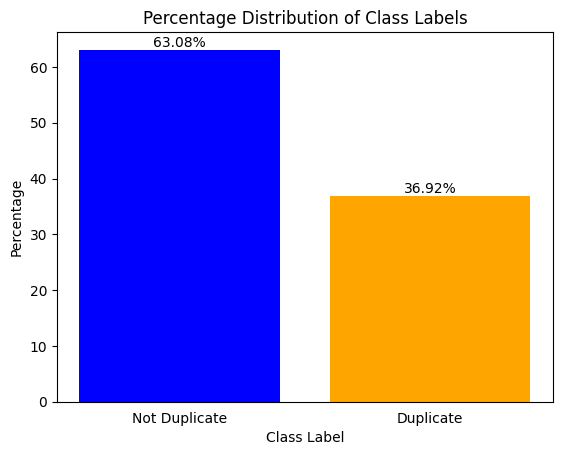

In [13]:
# Calculate the percentage of each class label
class_percentages = df['is_duplicate'].value_counts(normalize=True) * 100

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(['Not Duplicate', 'Duplicate'], class_percentages.values, color=['blue', 'orange'])

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, class_percentages.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# Set plot title and axis labels
ax.set_title('Percentage Distribution of Class Labels')
ax.set_xlabel('Class Label')
ax.set_ylabel('Percentage')

# Remove x-axis ticks (optional)
ax.tick_params(axis='x', which='both', bottom=False)

# Show the plot
plt.show()

In [14]:
total_rows = df.shape[0]
not_duplicate_count = df.groupby('is_duplicate')['id'].count()[0]
duplicate_count = df.groupby('is_duplicate')['id'].count()[1]

print(f"Total rows: {total_rows}")
print(f"Count of 0 (Not duplicate): {not_duplicate_count} ({round(not_duplicate_count/total_rows*100, 2)}%)")
print(f"Count of 1 (Duplicate): {duplicate_count} ({round(duplicate_count/total_rows*100, 2)}%)")

Total rows: 404290
Count of 0 (Not duplicate): 255027 (63.08%)
Count of 1 (Duplicate): 149263 (36.92%)


<h3>3.2.2 Number of unique questions</h3>

In [15]:
# Combine 'qid1' and 'qid2' columns into a single Series
total_qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Total questions: ", len(total_qids))

# Calculate the total number of unique ids
unique_qids = len(total_qids.unique())
print(f"Total unique questions: {unique_qids} ({round(unique_qids/len(total_qids)*100, 2)}%)")

# Count the occurrences of each id
count_qids = total_qids.value_counts()

# Filter out ids that are not unique (occurs more than once)
not_unique_qids_counts = count_qids[count_qids > 1]
print(f"Number of unique questions that appear more than one time: {len(not_unique_qids_counts)} ({round(len(not_unique_qids_counts)/len(total_qids)*100, 2)}%)")

print("Max number of times a single question is repeated: ", max(count_qids))

print(f"The question which occured most no of times is: {df[df['qid1'] == 2559]['question1'].unique()}")

Total questions:  808580
Total unique questions: 537933 (66.53%)
Number of unique questions that appear more than one time: 111780 (13.82%)
Max number of times a single question is repeated:  157
The question which occured most no of times is: ['What are the best ways to lose weight?']


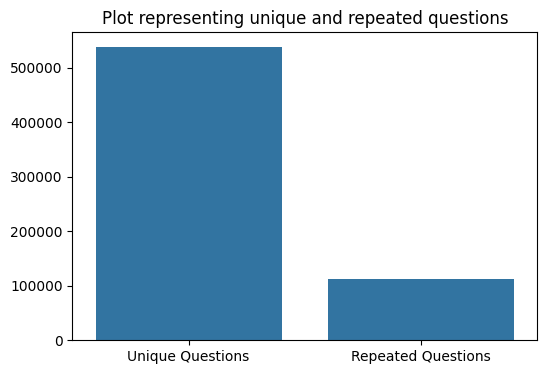

In [16]:
x = ["Unique Questions", "Repeated Questions"]
y = [unique_qids, len(not_unique_qids_counts)]

plt.figure(figsize=(6, 4))
plt.bar(x, y, color=['blue', 'orange'])
plt.title("Plot representing unique and repeated questions")
plt.show()

<h3>3.2.3 Checking for Duplicates </h3>

In [17]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


<h3> 3.2.4 Number of occurrences of each question </h3>

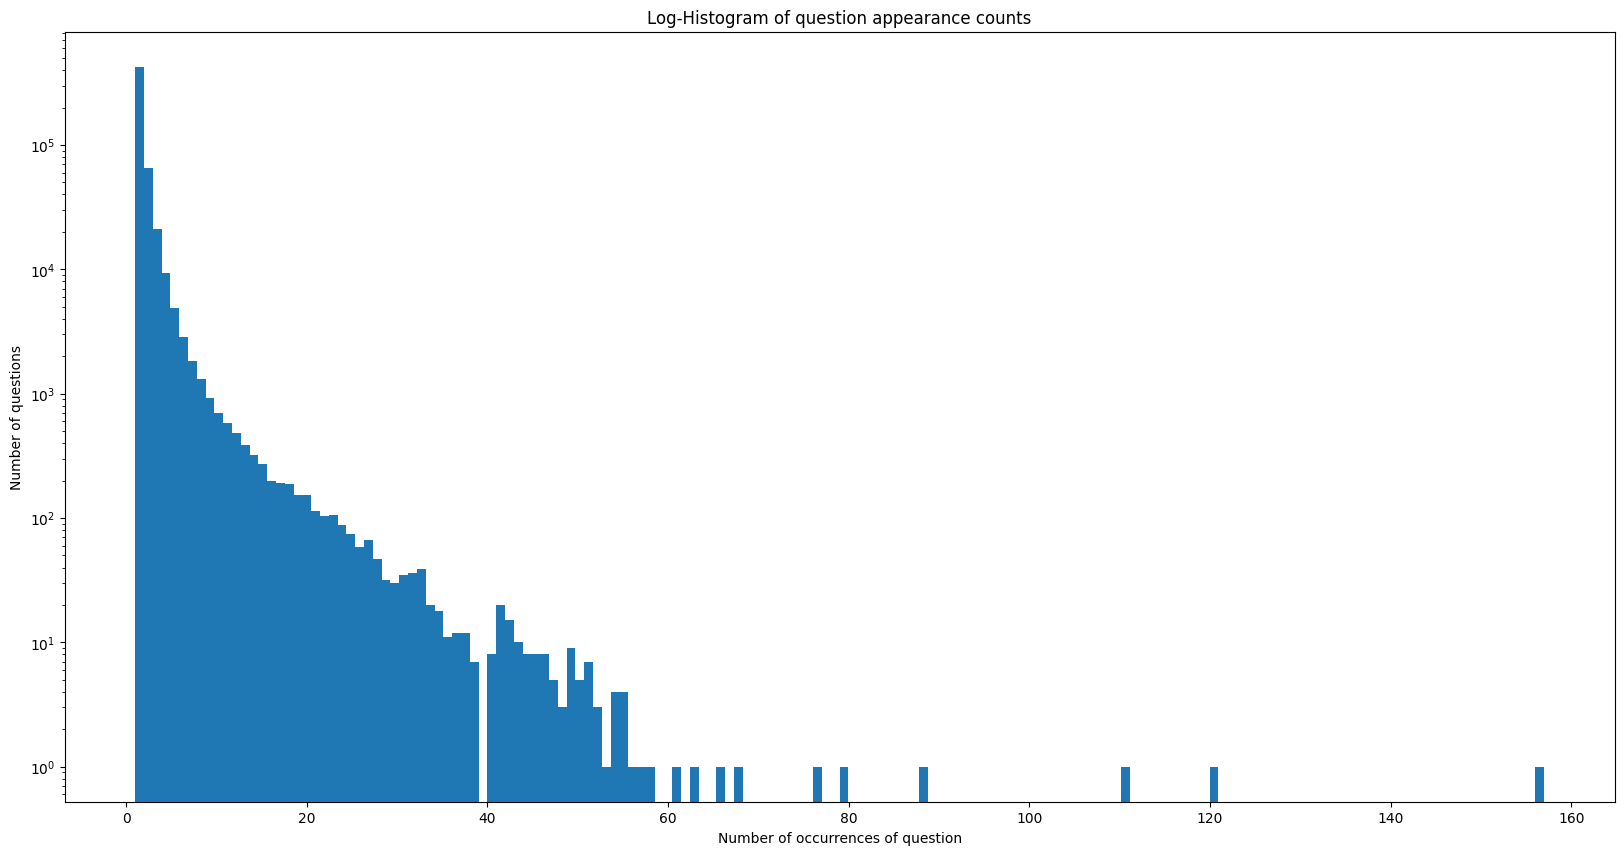

In [18]:
plt.figure(figsize=(20, 10))

# Assuming total_qids is your Series
counts = total_qids.value_counts()
plt.hist(counts, bins=160, color='skyblue', edgecolor='black', log=True)

plt.title('Log-Histogram of Question Appearance Counts')
plt.xlabel('Number of Occurrences of Question')
plt.ylabel('Number of Questions')

plt.show()

<h3> 3.2.5 Checking for NULL values </h3>

In [19]:
null_count_question1 = df["question1"].isnull().sum()
print("Total no. of rows where we have null value in question1: ", null_count_question1)
rows_with_nulls = df[df["question1"].isnull()]
rows_with_nulls

Total no. of rows where we have null value in question1:  1


,id,qid1,qid2,question1,question2,is_duplicate
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [20]:
null_count_question2 = df["question2"].isnull().sum()
print("Total no. of rows where we have null value in question2: ", null_count_question2)
rows_with_nulls = df[df["question2"].isnull()]
rows_with_nulls

Total no. of rows where we have null value in question2:  2


,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


In [21]:
df = df.dropna(subset=['question1'])
df = df.dropna(subset=['question2'])
print("After deleting the rows where we have null values: ",df.shape[0])

After deleting the rows where we have null values:  404287


<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

<h3>3.3.1 Convert the non english text to english text</h3>

In [22]:
def translate_text(text, target_language='en'):
    try:
        translator = Translator(to_lang=target_language)
        translation = translator.translate(text)
        return translation
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Assuming df is your DataFrame
# Apply translation function to each row in the DataFrame using tqdm for progress tracking
tqdm.pandas(desc="Translating", unit="row")

# Create new columns for translated text
df['question1'] = df['question1'].progress_apply(translate_text)
df['question1'] = df['question1'].progress_apply(translate_text)

Translating: 100%|██████████| 404287/404287 [00:01<00:00, 289843.87row/s]


<h3>3.3.2 Check the text belongs to english or not</h3>

In [23]:
# # Function to check if any non-English word is present in a given text
# def has_non_english_word(text):
#     words = text.split()
#     for word in words:
#         if langid.classify(word)[0] != 'en':  # 'en' represents English language
#             print(word)
#             return True
#     return False

# # Apply the function to each row in the DataFrame with tqdm
# non_english_rows = []
# for index, row in tqdm(df.iterrows(), total=len(df), desc="Checking rows"):
#     if has_non_english_word(row['question1']) or has_non_english_word(row['question2']):
#         non_english_rows.append(index)

In [24]:
# # Print the rows with non-English words
# print("Rows with non-English words:")
# print("Total rows where question1 and question2 text does not belong to english: ", df.loc[non_english_rows].shape[0])
# df.loc[non_english_rows]

Rows with non-English words:


NameError: name 'non_english_rows' is not defined

In [ ]:
# Drop the rows with non-English words from the original DataFrame
df.drop(non_english_rows, inplace=True)

# Display the updated DataFrame
print(f"we have {df.shape[0]} rows and {df.shape[1]} columns. ")
print("\nDataFrame after removing rows with non-English words:")
df

<h3>3.3.3 Simple Feature extractor</h3>

Let us now construct a few features like:
<ul>
<b>Frequency Features:</b>
<br>
<li>freq_qid1: How often Question 1 appears in your dataset.</li>
<li>freq_qid2: How often Question 2 appears in your dataset.</li>
<li>freq_q1+freq_q2: Sum of the frequencies of both questions, indicating their combined prevalence.</li>
<li>freq_q1-freq_q2: Absolute difference of their frequencies, highlighting how much more frequent one question is compared to the other.</li>
    
<b>Length Features:</b>

<li>q1len: Number of characters in Question 1.</li>
<li>q2len: Number of characters in Question 2.</li>
    <br>
<b>Word Features:</b>
<br>
<li>q1_n_words: Number of words in Question 1.</li>
<li>q2_n_words: Number of words in Question 2.</li>
<li>word_Common: Number of unique words that appear in both Question 1 and Question 2, suggesting shared vocabulary.</li>
<li>word_Total: Total number of words across both questions (q1_n_words + q2_n_words).</li>
<li>word_share: Proportion of common words compared to the total number of words in both questions (word_common / word_total), indicating lexical overlap.</li>
</ul>

In [ ]:
# Calculate the frequency of occurrence for each question in 'qid1' and 'qid2'
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')

# Calculate the length (number of characters) of each question in 'question1' and 'question2'
df['q1len'] = df['question1'].str.len()
df['q2len'] = df['question2'].str.len()

# Calculate the number of words in each question in 'question1' and 'question2'
df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

# Function to calculate the number of common words between two questions
def normalized_word_common(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1.intersection(w2))

# Create a new feature 'word_common' by applying the function to each row
df['word_common'] = df.apply(normalized_word_common, axis=1)

# Function to calculate the total number of unique words in two questions
def normalized_word_Total(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

# Create a new feature 'word_Total' by applying the function to each row
df['word_Total'] = df.apply(normalized_word_Total, axis=1)

# Function to calculate the normalized word share between two questions
def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2) / (len(w1) + len(w2))

# Create a new feature 'word_share' by applying the function to each row
df['word_share'] = df.apply(normalized_word_share, axis=1)

# Create a new feature 'freq_q1+q2' representing the sum of frequencies of 'qid1' and 'qid2'
df['freq_q1+q2'] = df['freq_qid1'] + df['freq_qid2']

# Create a new feature 'freq_q1-q2' representing the absolute difference of frequencies between 'qid1' and 'qid2'
df['freq_q1-q2'] = abs(df['freq_qid1'] - df['freq_qid2'])

<h3> 3.3.4 Analysis of some of the extracted features </h3>

<h4> 3.3.4.1 Feature: word_share </h4>

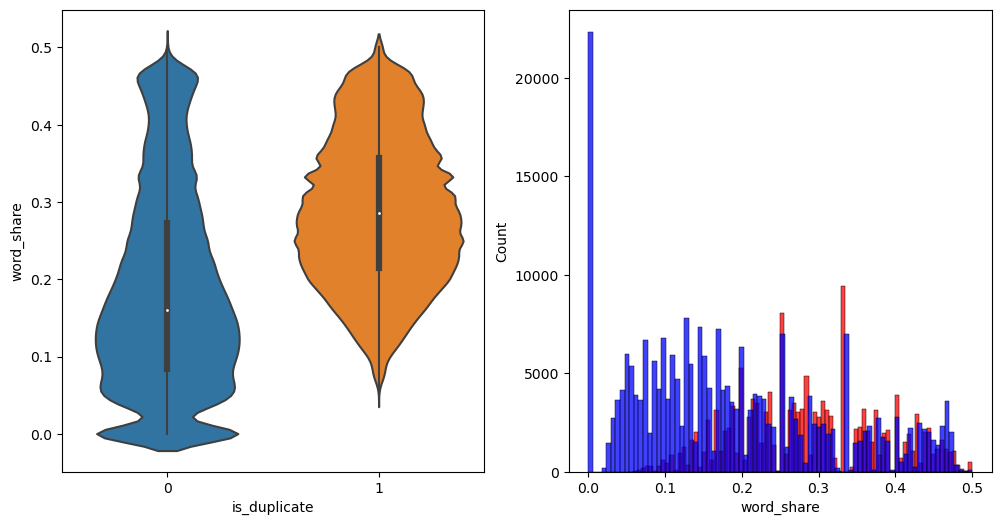

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.histplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.histplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue')
plt.show()

<h4> 3.3.4.2 Feature: word_Common </h4>

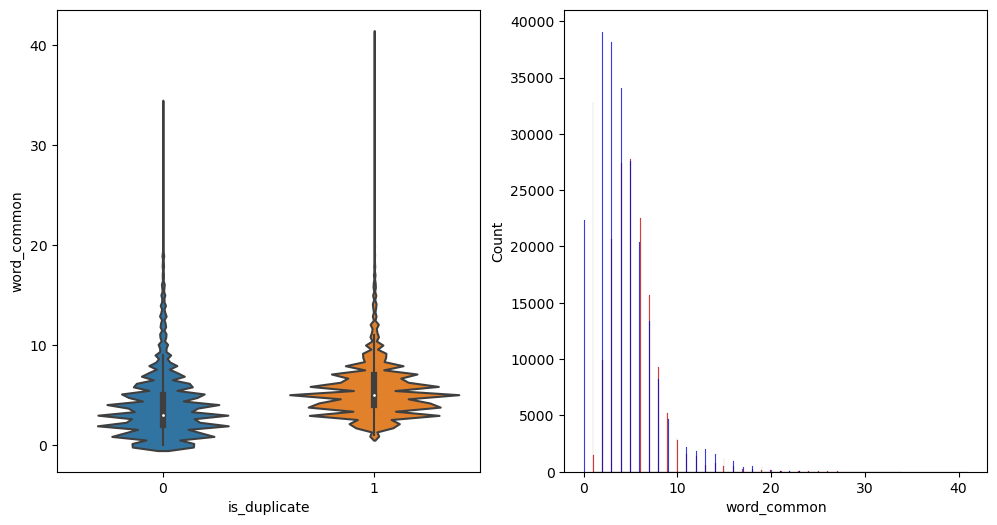

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_common', data = df[0:])

plt.subplot(1,2,2)
sns.histplot(df[df['is_duplicate'] == 1.0]['word_common'][0:] , label = "1", color = 'red')
sns.histplot(df[df['is_duplicate'] == 0.0]['word_common'][0:] , label = "0" , color = 'blue' )
plt.show()

<h2> 3.5 : EDA: Advanced Feature Extraction.</h2>

<h3> 3.5.1 Preprocessing of Text </h3>

<ol>
<li>
<b>Removing HTML Tags:</b>
    When dealing with text data obtained from web pages, it often contains HTML tags that are used for formatting and styling. Removing these tags ensures that only the actual text content is considered.
</li>

<li>
<b>Removing Punctuations:</b>
    Punctuation marks (e.g., commas, periods, exclamation marks) don't usually carry much semantic meaning in NLP tasks. Removing them simplifies the text and helps in reducing dimensionality in text data.
</li>

<li>
<b>Performing Stemming:</b>
    Stemming involves reducing words to their root or base form. For example, "running" becomes "run." This is done to consolidate words with the same base meaning, reducing the vocabulary size and improving model efficiency.
</li>

<li>
<b>Removing Stopwords:</b>
    Stopwords are common words (e.g., "the," "and," "is") that don't contribute much to the meaning of a text. Removing them helps in focusing on the more meaningful words for analysis.
</li>

<li>
<b>Expanding Contractions:</b>
    Contractions are shortened forms of words (e.g., "don't" for "do not"). Expanding contractions ensures that each word is treated as a separate token, helping the model better understand the text.
</li>

In [25]:
def preprocess_text(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()

    # Expand contractions
    text = contractions.fix(text)

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    text = ' '.join(filtered_words)

    # Perform stemming
    porter = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [porter.stem(word) for word in words]
    text = ' '.join(stemmed_words)

    return text

# Apply tqdm to the DataFrame processing
tqdm.pandas()

# Convert text in 'question1' and 'question2' columns to lowercase
df['question1'] = df['question1'].str.lower()
df['question2'] = df['question2'].str.lower()

# Apply the preprocessing function to 'question1' and 'question2' columns
df['question1'] = df['question1'].progress_apply(preprocess_text)
df['question2'] = df['question2'].progress_apply(preprocess_text)

100%|██████████| 404287/404287 [02:53<00:00, 2334.13it/s]


<h2> 3.6 Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [26]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    SAFE_DIV = 0.0001 
    stop_words = set(stopwords.words('english'))

    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in stop_words])
    q2_words = set([word for word in q2_tokens if word not in stop_words])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in stop_words])
    q2_stops = set([word for word in q2_tokens if word in stop_words])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both questions is same or not
    if q1_tokens and q2_tokens:
        token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    else:
        token_features[6] = 0  # or any default value you prefer


    # First word of both question is same or not
    if q1_tokens and q2_tokens:
        token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    else:
        token_features[7] = 0  # or any default value you prefer

    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2

    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    token_features = list(tqdm(df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1), desc="Processing rows", total=len(df)))
    
    df["cwc_min"] = list(map(lambda x: x[0], token_features))
    df["cwc_max"] = list(map(lambda x: x[1], token_features))
    df["csc_min"] = list(map(lambda x: x[2], token_features))
    df["csc_max"] = list(map(lambda x: x[3], token_features))
    df["ctc_min"] = list(map(lambda x: x[4], token_features))
    df["ctc_max"] = list(map(lambda x: x[5], token_features))
    df["last_word_eq"] = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"] = list(map(lambda x: x[8], token_features))
    df["mean_len"] = list(map(lambda x: x[9], token_features))

    # Computing Fuzzy Features and Merging with Dataset
    df["token_set_ratio"] = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    df["token_sort_ratio"] = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"] = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"] = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"] = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    
    return df

df = extract_features(df)
df.head()

Processing rows: 100%|██████████| 404287/404287 [00:00<00:00, 3560388.31it/s]


,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,step step guid invest share market india,step step guid invest share market,0,0.999980,0.833319,0.0,0.0,...,0.714276,0,1,0.0,6.5,100,92,92,100,0.971429
1,1,3,4,stori kohinoor kohinoor diamond,would happen indian govern stole kohinoor kohi...,0,0.666644,0.249997,0.0,0.0,...,0.222220,0,0,0.0,6.5,84,62,62,94,0.812500
2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dn,0,0.599988,0.499992,0.0,0.0,...,0.499992,0,0,0.0,5.5,85,71,44,44,0.290323
3,3,7,8,mental lone solv,find remaind math2324math divid 2423,0,0.000000,0.000000,0.0,0.0,...,0.000000,0,0,0.0,4.0,19,19,23,25,0.058824
4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0,0.399992,0.199998,0.0,0.0,...,0.199998,0,0,0.0,7.5,53,42,24,50,0.206897


<h3>3.6.1 Analysis of extracted features </h3>

<h4> 3.6.1.1 Plotting Word clouds</h4>

In [27]:
df_duplicate = df[df['is_duplicate']==1]
df_not_duplicate = df[df['is_duplicate']==0]

all_duplicate_question = np.dstack([df_duplicate['question1'], df_duplicate['question2']]).flatten()
all_not_duplicate_question = np.dstack([df_not_duplicate['question1'], df_not_duplicate['question2']]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(all_duplicate_question))
print ("Number of data points in class 0 (non duplicate pairs) :",len(all_not_duplicate_question))

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510048


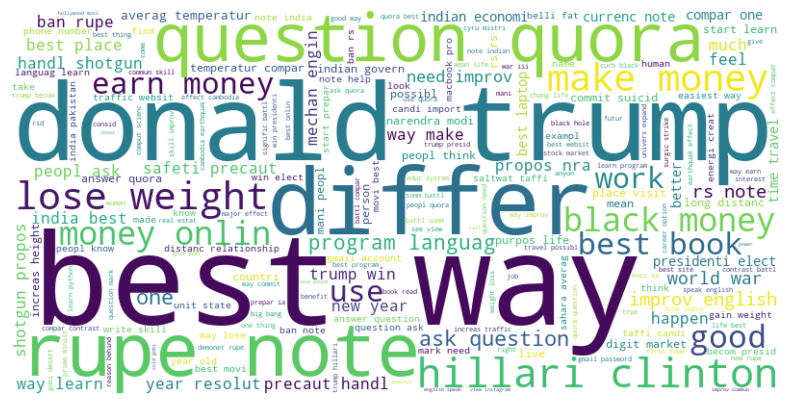

In [28]:
# Combine the sentences into a single string
text = " ".join(all_duplicate_question)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

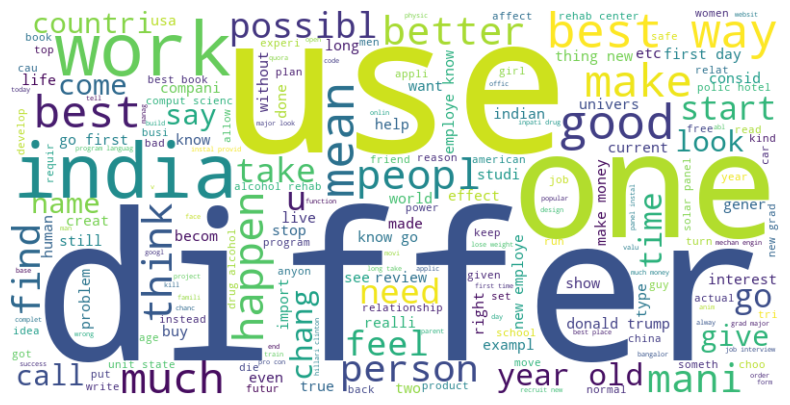

In [29]:
# Combine the sentences into a single string
text = " ".join(all_not_duplicate_question)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h4> 3.6.1.2 Plotting pair plot</h4>

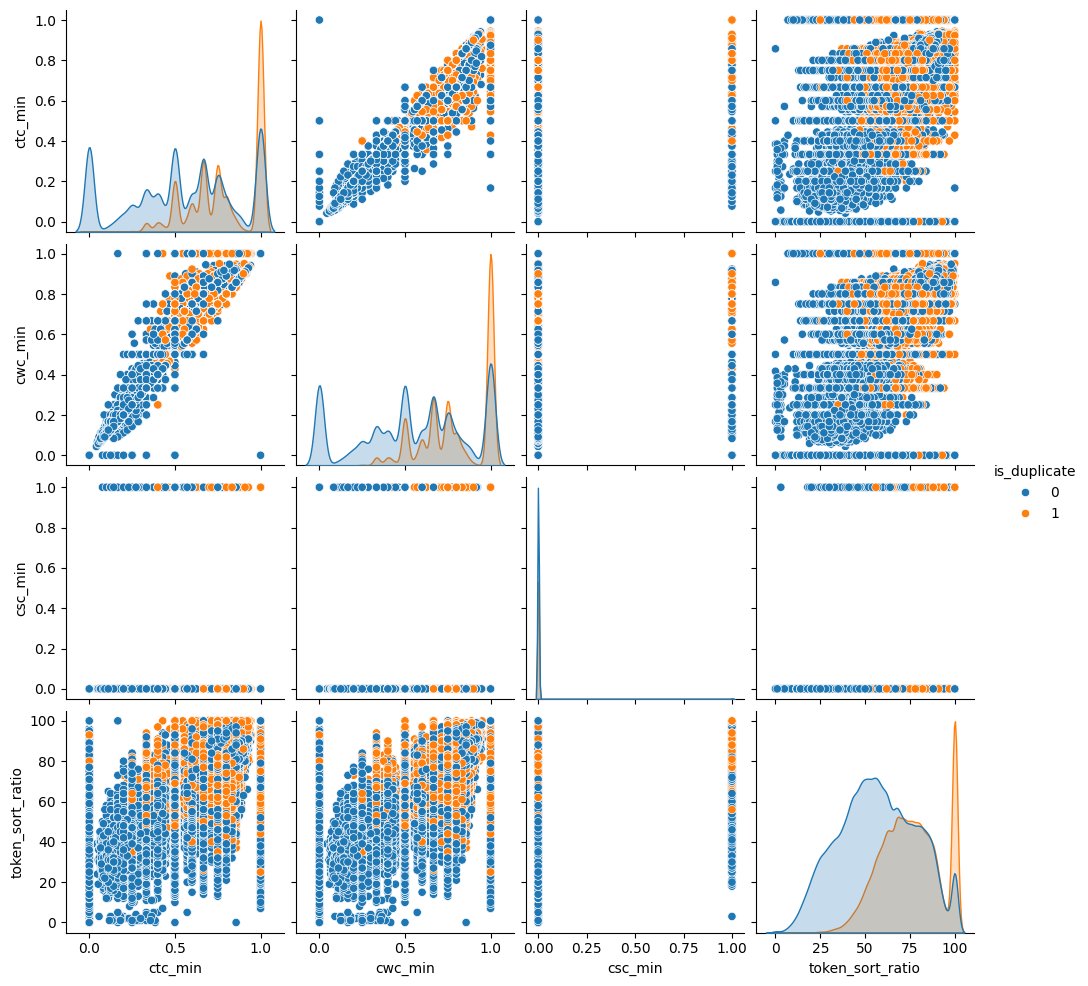

In [30]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

<h4> 3.6.1.3 Plotting violin plot with histogram</h4>

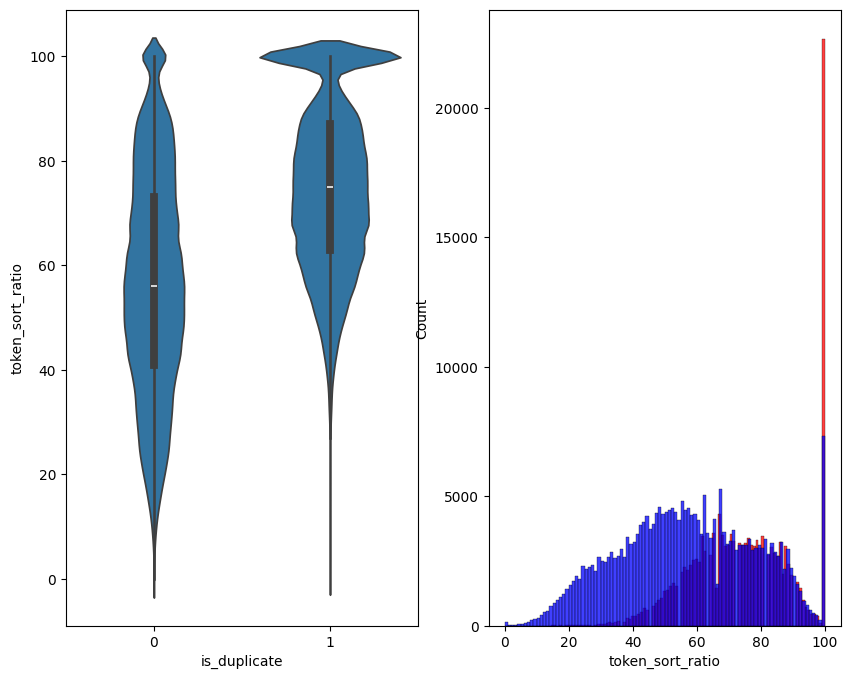

In [31]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.histplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.histplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

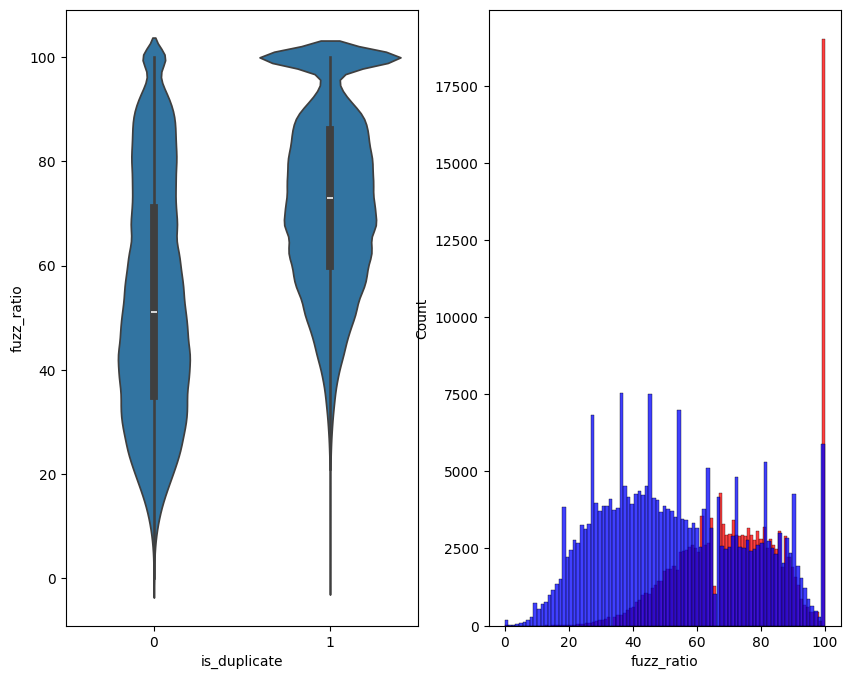

In [32]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.histplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.histplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

<h4> 3.6.1. Preprocessing the text</h4>

In [33]:
# Step 1: Identify rows with empty values
empty_rows = df.applymap(lambda x: len(str(x).strip()) == 0 or str(x).strip().lower() == 'null').any(axis=1)

# Step 2: Drop the rows with empty values
df = df[~empty_rows]

# Step 3: Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [34]:
df.to_csv('preprocessed_data.csv', index=False)

In [35]:
try:
    df = pd.read_csv('preprocessed_data.csv')
except FileNotFoundError:
    print("Please check the path of CSV file.")
else:
    print("Succesfully load the data")

Succesfully load the data


In [36]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,step step guid invest share market india,step step guid invest share market,0,0.999980,0.833319,0.0,0.0,...,0.714276,0,1,0.0,6.5,100,92,92,100,0.971429
1,1,3,4,stori kohinoor kohinoor diamond,would happen indian govern stole kohinoor kohi...,0,0.666644,0.249997,0.0,0.0,...,0.222220,0,0,0.0,6.5,84,62,62,94,0.812500
2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dn,0,0.599988,0.499992,0.0,0.0,...,0.499992,0,0,0.0,5.5,85,71,44,44,0.290323
3,3,7,8,mental lone solv,find remaind math2324math divid 2423,0,0.000000,0.000000,0.0,0.0,...,0.000000,0,0,0.0,4.0,19,19,23,25,0.058824
4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0,0.399992,0.199998,0.0,0.0,...,0.199998,0,0,0.0,7.5,53,42,24,50,0.206897


In [34]:
print(f"we have {df.shape[0]} rows and {df.shape[1]} columns. ")

we have 404155 rows and 32 columns. 


In [35]:
X = df.drop(['is_duplicate'], axis=1)
Y = df['is_duplicate']

<h1> 4. Prepare dataset for Model building  </h1>

<h2>4.1 Splitting the data into Train, cv, Test</h2>

In [36]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [37]:
print('Number of data points in train data:', X_train.shape)
print('Number of data points in test data:', X_test.shape)
print('Number of data points in cross validation data:', X_cv.shape)

Number of data points in train data: (258659, 31)
Number of data points in test data: (80831, 31)
Number of data points in cross validation data: (64665, 31)


In [38]:
X_train_questions_df = X_train[['question1', 'question2']]
X_train_numeric_df   = X_train.drop(['question1', 'question2'], axis=1)

X_test_questions_df  = X_test[['question1', 'question2']]
X_test_numeric_df    = X_test.drop(['question1', 'question2'], axis=1)

X_cv_questions_df    = X_cv[['question1', 'question2']]
X_cv_numeric_df      = X_cv.drop(['question1', 'question2'], axis=1)

<h2> 4.2 Text featurization</h2>

<h3> 4.2.1 Bow featurization </h3>

In [39]:
# Create a CountVectorizer instance with a maximum of 3000 features
bow_vectorizer = CountVectorizer(max_features=3000)

# Combine question1 and question2 columns from training dataset
X_train_questions = list(X_train_questions_df['question1']) + list(X_train_questions_df['question2'])
# Combine question1 and question2 columns from test dataset
X_test_questions  = list(X_test_questions_df['question1']) + list(X_test_questions_df['question2'])
# Combine question1 and question2 columns from cross-validation dataset
X_cv_questions    = list(X_cv_questions_df['question1']) + list(X_cv_questions_df['question2'])

# Transform the combined text data into bag-of-words representation for training data
X_train_q1_arr, X_train_q2_arr = np.vsplit(bow_vectorizer.fit_transform(X_train_questions).toarray(), 2)
# Create DataFrames from the transformed arrays with original indices and feature names
X_train_q1_df1 = pd.DataFrame(X_train_q1_arr, index=X_train_questions_df.index, columns=bow_vectorizer.get_feature_names_out())
X_train_q1_df2 = pd.DataFrame(X_train_q2_arr, index=X_train_questions_df.index, columns=bow_vectorizer.get_feature_names_out())
# Concatenate the created DataFrames along the columns
X_train_bow_questions_df = pd.concat([X_train_q1_df1, X_train_q1_df2], axis=1)
# Concatenate bag-of-words representation with numeric features for training data
X_train_bow = pd.concat([X_train_numeric_df, X_train_bow_questions_df], axis=1)

# Transform the combined text data into bag-of-words representation for test data
X_test_q1_arr, X_test_q2_arr = np.vsplit(bow_vectorizer.transform(X_test_questions).toarray(), 2)
# Create DataFrames from the transformed arrays with original indices and feature names
X_test_q1_df1 = pd.DataFrame(X_test_q1_arr, index=X_test_questions_df.index, columns=bow_vectorizer.get_feature_names_out())
X_test_q1_df2 = pd.DataFrame(X_test_q2_arr, index=X_test_questions_df.index, columns=bow_vectorizer.get_feature_names_out())
# Concatenate the created DataFrames along the columns
X_test_bow_questions_df = pd.concat([X_test_q1_df1, X_test_q1_df2], axis=1)
# Concatenate bag-of-words representation with numeric features for test data
X_test_bow = pd.concat([X_test_numeric_df, X_test_bow_questions_df], axis=1)

# Transform the combined text data into bag-of-words representation for cross-validation data
X_cv_q1_arr, X_cv_q2_arr = np.vsplit(bow_vectorizer.transform(X_cv_questions).toarray(), 2)
# Create DataFrames from the transformed arrays with original indices and feature names
X_cv_q1_df1 = pd.DataFrame(X_cv_q1_arr, index=X_cv_questions_df.index, columns=bow_vectorizer.get_feature_names_out())
X_cv_q1_df2 = pd.DataFrame(X_cv_q2_arr, index=X_cv_questions_df.index, columns=bow_vectorizer.get_feature_names_out())
# Concatenate the created DataFrames along the columns
X_cv_bow_questions_df = pd.concat([X_cv_q1_df1, X_cv_q1_df2], axis=1)
# Concatenate bag-of-words representation with numeric features for cross-validation data
X_cv_bow = pd.concat([X_cv_numeric_df, X_cv_bow_questions_df], axis=1)

In [40]:
print("Total no of features we have generated using BOW is: ", 2*len(bow_vectorizer.get_feature_names_out()))
print('Number of data points in train data:', X_train_bow.shape)
print('Number of data points in test data:', X_test_bow.shape)
print('Number of data points in cross validation data:', X_cv_bow.shape)

Total no of features we have generated using BOW is:  6000
Number of data points in train data: (258659, 6029)
Number of data points in test data: (80831, 6029)
Number of data points in cross validation data: (64665, 6029)


<h3> 4.2.2 TF-IDF featurization </h3>

In [43]:
# Create a TF-IDF Vectorizer instance with a maximum of 3000 features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Combine question1 and question2 columns from the training dataset
X_train_questions = list(X_train_questions_df['question1']) + list(X_train_questions_df['question2'])
# Combine question1 and question2 columns from the test dataset
X_test_questions  = list(X_test_questions_df['question1']) + list(X_test_questions_df['question2'])
# Combine question1 and question2 columns from the cross-validation dataset
X_cv_questions    = list(X_cv_questions_df['question1']) + list(X_cv_questions_df['question2'])

# Transform the combined text data into TF-IDF representation for the training data
X_train_q1_arr, X_train_q2_arr = np.vsplit(tfidf_vectorizer.fit_transform(X_train_questions).toarray(), 2)
# Create DataFrames from the transformed arrays with original indices and feature names
X_train_q1_df1 = pd.DataFrame(X_train_q1_arr, index=X_train_questions_df.index, columns=tfidf_vectorizer.get_feature_names_out())
X_train_q1_df2 = pd.DataFrame(X_train_q2_arr, index=X_train_questions_df.index, columns=tfidf_vectorizer.get_feature_names_out())
# Concatenate the created DataFrames along the columns
X_train_tfidf_questions_df = pd.concat([X_train_q1_df1, X_train_q1_df2], axis=1)
# Concatenate TF-IDF representation with numeric features for training data
X_train_tfidf = pd.concat([X_train_numeric_df, X_train_tfidf_questions_df], axis=1)

# Transform the combined text data into TF-IDF representation for the test data
X_test_q1_arr, X_test_q2_arr = np.vsplit(tfidf_vectorizer.transform(X_test_questions).toarray(), 2)
# Create DataFrames from the transformed arrays with original indices and feature names
X_test_q1_df1 = pd.DataFrame(X_test_q1_arr, index=X_test_questions_df.index, columns=tfidf_vectorizer.get_feature_names_out())
X_test_q1_df2 = pd.DataFrame(X_test_q2_arr, index=X_test_questions_df.index, columns=tfidf_vectorizer.get_feature_names_out())
# Concatenate the created DataFrames along the columns
X_test_tfidf_questions_df = pd.concat([X_test_q1_df1, X_test_q1_df2], axis=1)
# Concatenate TF-IDF representation with numeric features for test data
X_test_tfidf = pd.concat([X_test_numeric_df, X_test_tfidf_questions_df], axis=1)

# Transform the combined text data into TF-IDF representation for the cross-validation data
X_cv_q1_arr, X_cv_q2_arr = np.vsplit(tfidf_vectorizer.transform(X_cv_questions).toarray(), 2)
# Create DataFrames from the transformed arrays with original indices and feature names
X_cv_q1_df1 = pd.DataFrame(X_cv_q1_arr, index=X_cv_questions_df.index, columns=tfidf_vectorizer.get_feature_names_out())
X_cv_q1_df2 = pd.DataFrame(X_cv_q2_arr, index=X_cv_questions_df.index, columns=tfidf_vectorizer.get_feature_names_out())
# Concatenate the created DataFrames along the columns
X_cv_tfidf_questions_df = pd.concat([X_cv_q1_df1, X_cv_q1_df2], axis=1)
# Concatenate TF-IDF representation with numeric features for cross-validation data
X_cv_tfidf = pd.concat([X_cv_numeric_df, X_cv_tfidf_questions_df], axis=1)

MemoryError: Unable to allocate 3.85 GiB for an array with shape (517318, 1000) and data type float64

In [ ]:
print("Total no of features we have generated using BOW is: ", 2*len(tfidf_vectorizer.get_feature_names_out()))
print('Number of data points in train data:', X_train_tfidf.shape)
print('Number of data points in test data:', X_test_tfidf.shape)
print('Number of data points in cross validation data:', X_cv_tfidf.shape)

<h3> 4.2.3 W2V featurization </h3>

In [ ]:
# Combine questions for training, testing, and cross-validation sets
X_train_questions = list(X_train_questions_df['question1']) + list(X_train_questions_df['question2'])
X_test_questions  = list(X_test_questions_df['question1']) + list(X_test_questions_df['question2'])
X_cv_questions    = list(X_cv_questions_df['question1']) + list(X_cv_questions_df['question2'])

# Tokenize the sentences into words
X_train_tokens = [nltk.word_tokenize(sent) for sent in X_train_questions]
X_test_tokens = [nltk.word_tokenize(sent) for sent in X_test_questions]
X_cv_tokens = [nltk.word_tokenize(sent) for sent in X_cv_questions]

# Create Word2Vec model
w2v_model = Word2Vec(sentences=X_train_tokens + X_test_tokens + X_cv_tokens, vector_size=300, window=5, min_count=1, workers=4)

# Function to convert a sentence to the average Word2Vec representation
def sentence_to_avg_w2v(sentence, model):
    words = word_tokenize(sentence)
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        # If none of the words in the sentence are in the vocabulary
        return np.zeros(model.vector_size)

# Convert questions to Word2Vec representations for training data
X_train_w2v_arr = np.array([sentence_to_avg_w2v(sentence, w2v_model) for sentence in X_train_questions])
X_train_q1_arr, X_train_q2_arr = np.vsplit(X_train_w2v_arr, 2)
X_train_q1_df1 = pd.DataFrame(X_train_q1_arr, index=X_train_questions_df.index)
X_train_q1_df2 = pd.DataFrame(X_train_q2_arr, index=X_train_questions_df.index)
X_train_w2v_questions_df = pd.concat([X_train_q1_df1, X_train_q1_df2], axis=1)
X_train_w2v = pd.concat([X_train_numeric_df, X_train_w2v_questions_df], axis=1)

# Convert questions to Word2Vec representations for test data
X_test_w2v_arr = np.array([sentence_to_avg_w2v(sentence, w2v_model) for sentence in X_test_questions])
X_test_q1_arr, X_test_q2_arr = np.vsplit(X_test_w2v_arr, 2)
X_test_q1_df1 = pd.DataFrame(X_test_q1_arr, index=X_test_questions_df.index)
X_test_q1_df2 = pd.DataFrame(X_test_q2_arr, index=X_test_questions_df.index)
X_test_w2v_questions_df = pd.concat([X_test_q1_df1, X_test_q1_df2], axis=1)
X_test_w2v = pd.concat([X_test_numeric_df, X_test_w2v_questions_df], axis=1)

# Convert questions to Word2Vec representations for cross-validation data
X_cv_w2v_arr = np.array([sentence_to_avg_w2v(sentence, w2v_model) for sentence in X_cv_questions])
X_cv_q1_arr, X_cv_q2_arr = np.vsplit(X_cv_w2v_arr, 2)
X_cv_q1_df1 = pd.DataFrame(X_cv_q1_arr, index=X_cv_questions_df.index)
X_cv_q1_df2 = pd.DataFrame(X_cv_q2_arr, index=X_cv_questions_df.index)
X_cv_w2v_questions_df = pd.concat([X_cv_q1_df1, X_cv_q1_df2], axis=1)
X_cv_w2v = pd.concat([X_cv_numeric_df, X_cv_w2v_questions_df], axis=1)

In [ ]:
print('Number of data points in train data:', X_train_w2v.shape)
print('Number of data points in test data:', X_test_w2v.shape)
print('Number of data points in cross validation data:', X_cv_w2v.shape)

<h3> 4.2.4 TF-IDF W2V featurization </h3>

<h2> 4.3 Model building </h2>

<h3> 4.3.1 Model performance visualize</h3>

In [ ]:
# Define a function to evaluate the performance of a classification model
def model_performance_metrics(y_test, y_pred):
    # Print a separator line for better visibility
    print("*" * 15 + "Performance metric" + "*" * 15)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Calculate the confusion matrix
    C = confusion_matrix(y_test, y_pred)
    
    # Calculate precision matrix by normalizing each column of the confusion matrix
    A = (((C.T) / (C.sum(axis=1))).T)
    
    # Calculate recall matrix by normalizing each row of the confusion matrix
    B = (C / C.sum(axis=0))
    
    # Define class labels
    labels = [1, 2]
    
    # Plot confusion matrix heatmap
    print("-" * 20, "Confusion matrix", "-" * 20)
    plt.figure(figsize=(3, 3))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    # Print and plot precision matrix
    print("-" * 20, "Precision matrix (Column Sum=1)", "-" * 20)
    precision = precision_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")
    plt.figure(figsize=(3, 3))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # Print and plot recall matrix
    print("-" * 20, "Recall matrix (Row Sum=1)", "-" * 20)
    recall = recall_score(y_test, y_pred)
    print(f"Recall: {recall:.4f}")
    plt.figure(figsize=(3, 3))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # Print F1 Score
    print("-" * 20, "F1 Score", "-" * 20)
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1:.4f}")
    
    # Return calculated metrics
    return accuracy, precision, recall, f1

<h3>4.3.2 KNN Algorithm</h3>

In [ ]:
def knn_model(X_train, y_train, X_cv, y_cv, X_test, y_test, k_list):
    # Step 1: Define a list of even values for k up to max_k
    k_values = k_list
    # Initialize an array to store log loss for each value of k
    cv_log_error_array = []

    # Step 2: Loop through each value of k
    for k in k_values:
        # Initialize KNN classifier with the current value of k
        knn = KNeighborsClassifier(n_neighbors=k)
        # Fit the KNN model on the training data
        knn.fit(X_train, y_train)
        # Calibrate the model using sigmoid calibration
        sig_clf_knn = CalibratedClassifierCV(knn, method="sigmoid")
        sig_clf_knn.fit(X_train, y_train)
        # Predict probabilities on the cross-validation set
        sig_clf_probs_cv = sig_clf_knn.predict_proba(X_cv)

        # Calculate log loss and append to the array
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs_cv, labels=knn.classes_, eps=1e-15))

        # Print log loss for the current value of k
        print('For value of k =', k, 'The log loss is:', log_loss(y_cv, sig_clf_probs_cv))

    # Step 3: Plot the cross-validation error for each value of k
    fig, ax = plt.subplots()
    ax.plot(k_values, cv_log_error_array, c='g')
    for i, txt in enumerate(np.round(cv_log_error_array, 3)):
        ax.annotate((k_values[i], np.round(txt, 3)), (k_values[i], cv_log_error_array[i]))
    plt.grid()
    plt.title("Cross Validation Error for each k")
    plt.xlabel("K (Number of Neighbors)")
    plt.ylabel("Log Loss")
    plt.show()
    
    # Step 4: Identify the best k based on minimum log loss
    best_k = k_values[np.argmin(cv_log_error_array)]
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(X_train, y_train)

    # Calibrate the best model using sigmoid calibration
    best_sig_clf_knn = CalibratedClassifierCV(best_knn, method="sigmoid")
    best_sig_clf_knn.fit(X_train, y_train)

    # Predict probabilities on the training set for the best model
    predict_y_train = best_sig_clf_knn.predict_proba(X_train)
    knn_train_log_loss = log_loss(y_train, predict_y_train, labels=best_knn.classes_, eps=1e-15)
    # Print log loss on the training set for the best model
    print('For values of best k =', best_k, "The train log loss is:", knn_train_log_loss)

    # Predict probabilities on the cross-validation set for the best model
    predict_y_cv = best_sig_clf_knn.predict_proba(X_cv)
    knn_cv_log_loss = log_loss(y_cv, predict_y_cv, labels=best_knn.classes_, eps=1e-15)
    # Print log loss on the cross-validation set for the best model
    print('For values of best k =', best_k, "The cv log loss is:", knn_cv_log_loss)

    # Predict probabilities on the test set for the best model
    predict_y_test = best_sig_clf_knn.predict_proba(X_test)
    knn_test_log_loss = log_loss(y_test, predict_y_test, labels=best_knn.classes_, eps=1e-15)
    # Print log loss on the test set for the best model
    print('For values of best k =', best_k, "The test log loss is:", knn_test_log_loss)
    
    # Calculate and print the number of misclassified points
    predict_y = best_sig_clf_knn.predict(X_test)
    knn_misclassified_points = np.count_nonzero((predict_y - y_test) != 0) / y_test.shape[0]
    print("Number of misclassified points:", knn_misclassified_points)

    
    # Print additional model performance metrics
    knn_accuracy, knn_precision, knn_recall, knn_f1 = model_performance_metrics(y_test, predict_y)
    
    return knn_accuracy, knn_precision, knn_recall, knn_f1, knn_train_log_loss, knn_cv_log_loss, knn_test_log_loss, knn_misclassified_points

In [ ]:
# X_train_bow, y_train, X_cv_bow, y_cv, X_test_bow, y_test are defined earlier
knn_bow_accuracy, knn_bow_precision, knn_bow_recall, knn_bow_f1, knn_bow_train_log_loss, knn_bow_cv_log_loss, knn_bow_test_log_loss, knn_bow_misclassified_points = knn_model(X_train_bow.values, y_train, X_cv_bow.values, y_cv, X_test_bow.values, y_test, [2, 4, 6, 8])

In [ ]:
# X_train_tfidf, y_train, X_cv_tfidf, y_cv, X_test_tfidf, y_test are defined earlier
knn_tfidf_accuracy, knn_tfidf_precision, knn_tfidf_recall, knn_tfidf_f1, knn_tfidf_train_log_loss, knn_tfidf_cv_log_loss, knn_tfidf_test_log_loss, knn_tfidf_misclassified_points = knn_model(X_train_tfidf.values, y_train, X_cv_tfidf.values, y_cv, X_test_tfidf.values, y_test, [2, 4, 6, 8])

In [ ]:
# X_train_w2v, y_train, X_cv_w2v, y_cv, X_test_w2v, y_test are defined earlier
knn_w2v_accuracy, knn_w2v_precision, knn_w2v_recall, knn_w2v_f1, knn_w2v_train_log_loss, knn_w2v_cv_log_loss, knn_w2v_test_log_loss, knn_w2v_misclassified_points = knn_model(X_train_w2v.values, y_train, X_cv_w2v.values, y_cv, X_test_w2v.values, y_test, [2, 4, 6, 8])

In [ ]:
<h3>4.3.3 Multinomial Naive bayes Algorithm</h3>

In [ ]:
def mnb_model(X_train, y_train, X_cv, y_cv, X_test, y_test, alpha_values):
    # Step 1: Define a list of alpha values
    alpha_list = alpha_values
    # Initialize an array to store log loss for each value of alpha
    cv_log_error_array = []

    # Step 2: Loop through each value of alpha
    for alpha in alpha_list:
        # Initialize Multinomial Naive Bayes classifier with the current value of alpha
        mnb = MultinomialNB(alpha=alpha)
        # Fit the Multinomial Naive Bayes model on the training data
        mnb.fit(X_train, y_train)
        # Calibrate the model using sigmoid calibration
        sig_clf_mnb = CalibratedClassifierCV(mnb, method="sigmoid")
        sig_clf_mnb.fit(X_train, y_train)
        # Predict probabilities on the cross-validation set
        sig_clf_probs_cv = sig_clf_mnb.predict_proba(X_cv)

        # Calculate log loss and append to the array
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs_cv, labels=mnb.classes_))

        # Print log loss for the current value of alpha
        print('For value of alpha =', alpha, 'The log loss is:', log_loss(y_cv, sig_clf_probs_cv))

    # Step 3: Plot the cross-validation error for each value of alpha
    fig, ax = plt.subplots()
    ax.plot(alpha_list, cv_log_error_array, c='g')
    for i, txt in enumerate(np.round(cv_log_error_array, 3)):
        ax.annotate((alpha_list[i], np.round(txt, 3)), (alpha_list[i], cv_log_error_array[i]))
    plt.grid()
    plt.title("Cross Validation Error for each alpha")
    plt.xlabel("Alpha (Smoothing Parameter)")
    plt.ylabel("Log Loss")
    plt.show()

    # Step 4: Identify the best alpha based on minimum log loss
    best_alpha = alpha_list[np.argmin(cv_log_error_array)]
    best_mnb = MultinomialNB(alpha=best_alpha)
    best_mnb.fit(X_train, y_train)

    # Calibrate the best model using sigmoid calibration
    best_sig_clf_mnb = CalibratedClassifierCV(best_mnb, method="sigmoid")
    best_sig_clf_mnb.fit(X_train, y_train)

    # Predict probabilities on the training set for the best model
    predict_y_train = best_sig_clf_mnb.predict_proba(X_train)
    mnb_train_log_loss = log_loss(y_train, predict_y_train, labels=best_mnb.classes_)
    # Print log loss on the training set for the best model
    print('For values of best alpha =', best_alpha, "The train log loss is:", mnb_train_log_loss)

    # Predict probabilities on the cross-validation set for the best model
    predict_y_cv = best_sig_clf_mnb.predict_proba(X_cv)
    mnb_cv_log_loss = log_loss(y_cv, predict_y_cv, labels=best_mnb.classes_)
    # Print log loss on the cross-validation set for the best model
    print('For values of best alpha =', best_alpha, "The cv log loss is:", mnb_cv_log_loss)

    # Predict probabilities on the test set for the best model
    predict_y_test = best_sig_clf_mnb.predict_proba(X_test)
    mnb_test_log_loss = log_loss(y_test, predict_y_test, labels=best_mnb.classes_)
    # Print log loss on the test set for the best model
    print('For values of best alpha =', best_alpha, "The test log loss is:", mnb_test_log_loss)

    # Calculate and print the number of misclassified points
    predict_y = best_sig_clf_mnb.predict(X_test)
    mnb_misclassified_points = np.count_nonzero((predict_y - y_test) != 0) / y_test.shape[0]
    print("Number of misclassified points:", mnb_misclassified_points)

    # Print additional model performance metrics
    mnb_accuracy, mnb_precision, mnb_recall, mnb_f1 = model_performance_metrics(y_test, predict_y)
    
    return mnb_accuracy, mnb_precision, mnb_recall, mnb_f1, mnb_train_log_loss, mnb_cv_log_loss, mnb_test_log_loss, mnb_misclassified_points

In [ ]:
# Assuming X_train_bow, y_train, X_cv_bow, y_cv, X_test_bow, y_test are defined earlier
mnb_bow_accuracy, mnb_bow_precision, mnb_bow_recall, mnb_bow_f1, mnb_bow_train_log_loss, mnb_bow_cv_log_loss, mnb_bow_test_log_loss, mnb_bow_misclassified_points = mnb_model(X_train_bow.values, y_train, X_cv_bow.values, y_cv, X_test_bow.values, y_test, [0.1, 0.5, 1.0, 2.0])

In [ ]:
# Assuming X_train_tfidf, y_train, X_cv_tfidf, y_cv, X_test_tfidf, y_test are defined earlier
mnb_tfidf_accuracy, mnb_tfidf_precision, mnb_tfidf_recall, mnb_tfidf_f1, mnb_tfidf_train_log_loss, mnb_tfidf_cv_log_loss, mnb_tfidf_test_log_loss, mnb_tfidf_misclassified_points = mnb_model(X_train_tfidf.values, y_train, X_cv_tfidf.values, y_cv, X_test_tfidf.values, y_test, [0.1, 0.5, 1.0, 2.0])

In [ ]:
# mnb_w2v_accuracy, mnb_w2v_precision, mnb_w2v_recall, mnb_w2v_f1, mnb_w2v_train_log_loss, mnb_w2v_cv_log_loss, mnb_w2v_test_log_loss, mnb_w2v_misclassified_points = mnb_model(X_train_w2v.values, y_train, X_cv_w2v.values, y_cv, X_test_w2v.values, y_test, [0.1, 0.5, 1.0, 2.0])

<h3>4.3.4 Logistic Regression Algorithm</h3>

In [ ]:
def logistic_regression_sgd_model(X_train, y_train, X_cv, y_cv, X_test, y_test, alpha_values):
    # Step 1: Define a list of alpha values
    alpha_list = alpha_values
    # Initialize an array to store log loss for each value of alpha
    cv_log_error_array = []

    # Step 2: Loop through each value of alpha
    for alpha in alpha_list:
        # Initialize Logistic Regression with SGD classifier with the current value of alpha
        log_reg_sgd = SGDClassifier(loss='log_loss', alpha=alpha)
        # Fit the Logistic Regression with SGD model on the training data
        log_reg_sgd.fit(X_train, y_train)
        # Calibrate the model using sigmoid calibration
        sig_clf_log_reg_sgd = CalibratedClassifierCV(log_reg_sgd, method="sigmoid")
        sig_clf_log_reg_sgd.fit(X_train, y_train)
        # Predict probabilities on the cross-validation set
        sig_clf_probs_cv = sig_clf_log_reg_sgd.predict_proba(X_cv)

        # Calculate log loss and append to the array
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs_cv, labels=log_reg_sgd.classes_))

        # Print log loss for the current value of alpha
        print('For value of alpha =', alpha, 'The log loss is:', log_loss(y_cv, sig_clf_probs_cv))

    # Step 3: Plot the cross-validation error for each value of alpha
    fig, ax = plt.subplots()
    ax.plot(alpha_list, cv_log_error_array, c='g')
    for i, txt in enumerate(np.round(cv_log_error_array, 3)):
        ax.annotate((alpha_list[i], np.round(txt, 3)), (alpha_list[i], cv_log_error_array[i]))
    plt.grid()
    plt.title("Cross Validation Error for each alpha")
    plt.xlabel("Alpha (Regularization Parameter)")
    plt.ylabel("Log Loss")
    plt.show()

    # Step 4: Identify the best alpha based on minimum log loss
    best_alpha = alpha_list[np.argmin(cv_log_error_array)]
    best_log_reg_sgd = SGDClassifier(loss='log_loss', alpha=best_alpha)
    best_log_reg_sgd.fit(X_train, y_train)

    # Calibrate the best model using sigmoid calibration
    best_sig_clf_log_reg_sgd = CalibratedClassifierCV(best_log_reg_sgd, method="sigmoid")
    best_sig_clf_log_reg_sgd.fit(X_train, y_train)

    # Predict probabilities on the training set for the best model
    predict_y_train = best_sig_clf_log_reg_sgd.predict_proba(X_train)
    log_reg_sgd_train_log_loss = log_loss(y_train, predict_y_train, labels=best_log_reg_sgd.classes_)
    # Print log loss on the training set for the best model
    print('For values of best alpha =', best_alpha, "The train log loss is:", log_loss(y_train, predict_y_train, labels=best_log_reg_sgd.classes_))

    # Predict probabilities on the cross-validation set for the best model
    predict_y_cv = best_sig_clf_log_reg_sgd.predict_proba(X_cv)
    log_reg_sgd_cv_log_loss = log_loss(y_cv, predict_y_cv, labels=best_log_reg_sgd.classes_)
    # Print log loss on the cross-validation set for the best model
    print('For values of best alpha =', best_alpha, "The cv log loss is:", log_reg_sgd_train_log_loss)

    # Predict probabilities on the test set for the best model
    predict_y_test = best_sig_clf_log_reg_sgd.predict_proba(X_test)
    log_reg_sgd_test_log_loss = log_loss(y_test, predict_y_test, labels=best_log_reg_sgd.classes_)
    # Print log loss on the test set for the best model
    print('For values of best alpha =', best_alpha, "The test log loss is:", log_reg_sgd_test_log_loss)

    # Calculate and print the number of misclassified points
    predict_y = best_sig_clf_log_reg_sgd.predict(X_test)
    log_reg_sgd_misclassified_points =  np.count_nonzero((predict_y - y_test) != 0) / y_test.shape[0]
    print("Number of misclassified points:", log_reg_sgd_misclassified_points)

    # Print additional model performance metrics
    log_reg_sgd_accuracy, log_reg_sgd_precision, log_reg_sgd_recall, log_reg_sgd_f1 = model_performance_metrics(y_test, predict_y)
    
    return log_reg_sgd_accuracy, log_reg_sgd_precision, log_reg_sgd_recall, log_reg_sgd_f1, log_reg_sgd_train_log_loss, log_reg_sgd_cv_log_loss, log_reg_sgd_test_log_loss, log_reg_sgd_misclassified_points

In [ ]:
# Assuming X_train_bow, y_train, X_cv_bow, y_cv, X_test_bow, y_test are defined earlier
log_reg_sgd_bow_accuracy, log_reg_sgd_bow_precision, log_reg_sgd_bow_recall, log_reg_sgd_bow_f1, log_reg_sgd_bow_train_log_loss, log_reg_sgd_bow_cv_log_loss, log_reg_sgd_bow_test_log_loss, log_reg_sgd_bow_misclassified_points = logistic_regression_sgd_model(X_train_bow.values, y_train, X_cv_bow.values, y_cv, X_test_bow.values, y_test, [0.0001, 0.001, 0.01, 0.1])

In [ ]:
# Assuming X_train_tfidf, y_train, X_cv_tfidf, y_cv, X_test_tfidf, y_test are defined earlier
log_reg_sgd_tfidf_accuracy, log_reg_sgd_tfidf_precision, log_reg_sgd_tfidf_recall, log_reg_sgd_tfidf_f1, log_reg_sgd_tfidf_train_log_loss, log_reg_sgd_tfidf_cv_log_loss, log_reg_sgd_tfidf_test_log_loss, log_reg_sgd_tfidf_misclassified_points = logistic_regression_sgd_model(X_train_tfidf.values, y_train, X_cv_tfidf.values, y_cv, X_test_tfidf.values, y_test, [0.0001, 0.001, 0.01, 0.1])

In [ ]:
# Assuming X_train_w2v, y_train, X_cv_w2v, y_cv, X_test_w2v, y_test are defined earlier
log_reg_sgd_w2v_accuracy, log_reg_sgd_w2v_precision, log_reg_sgd_w2v_recall, log_reg_sgd_w2v_f1, log_reg_sgd_w2v_train_log_loss, log_reg_sgd_w2v_cv_log_loss, log_reg_sgd_w2v_test_log_loss, log_reg_sgd_w2v_misclassified_points = logistic_regression_sgd_model(X_train_w2v.values, y_train, X_cv_w2v.values, y_cv, X_test_w2v.values, y_test, [0.0001, 0.001, 0.01, 0.1])

<h3>4.3.5 Linear SVM Algorithm</h3>

In [ ]:
def linear_svm_sgd_model(X_train, y_train, X_cv, y_cv, X_test, y_test, alpha_values):
    # Step 1: Define a list of alpha values
    alpha_list = alpha_values
    # Initialize an array to store log loss for each value of alpha
    cv_log_error_array = []

    # Step 2: Loop through each value of alpha
    for alpha in alpha_list:
        # Initialize Linear SVM with SGD classifier with the current value of alpha
        linear_svm_sgd = SGDClassifier(loss='hinge', alpha=alpha, random_state=42)
        # Fit the Linear SVM with SGD model on the training data
        linear_svm_sgd.fit(X_train, y_train)
        # Calibrate the model using sigmoid calibration
        sig_clf_linear_svm_sgd = CalibratedClassifierCV(linear_svm_sgd, method="sigmoid")
        sig_clf_linear_svm_sgd.fit(X_train, y_train)
        # Predict probabilities on the cross-validation set
        sig_clf_probs_cv = sig_clf_linear_svm_sgd.predict_proba(X_cv)

        # Calculate log loss and append to the array
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs_cv, labels=linear_svm_sgd.classes_))

        # Print log loss for the current value of alpha
        print('For value of alpha =', alpha, 'The log loss is:', log_loss(y_cv, sig_clf_probs_cv))

    # Step 3: Plot the cross-validation error for each value of alpha
    fig, ax = plt.subplots()
    ax.plot(alpha_list, cv_log_error_array, c='g')
    for i, txt in enumerate(np.round(cv_log_error_array, 3)):
        ax.annotate((alpha_list[i], np.round(txt, 3)), (alpha_list[i], cv_log_error_array[i]))
    plt.grid()
    plt.title("Cross Validation Error for each alpha")
    plt.xlabel("Alpha (Regularization Parameter)")
    plt.ylabel("Log Loss")
    plt.show()

    # Step 4: Identify the best alpha based on minimum log loss
    best_alpha = alpha_list[np.argmin(cv_log_error_array)]
    best_linear_svm_sgd = SGDClassifier(loss='hinge', alpha=best_alpha, random_state=42)
    best_linear_svm_sgd.fit(X_train, y_train)

    # Calibrate the best model using sigmoid calibration
    best_sig_clf_linear_svm_sgd = CalibratedClassifierCV(best_linear_svm_sgd, method="sigmoid")
    best_sig_clf_linear_svm_sgd.fit(X_train, y_train)

    # Predict probabilities on the training set for the best model
    predict_y_train = best_sig_clf_linear_svm_sgd.predict_proba(X_train)
    linear_svm_sgd_train_log_loss = log_loss(y_train, predict_y_train, labels=best_linear_svm_sgd.classes_)
    # Print log loss on the training set for the best model
    print('For values of best alpha =', best_alpha, "The train log loss is:", )

    # Predict probabilities on the cross-validation set for the best model
    predict_y_cv = best_sig_clf_linear_svm_sgd.predict_proba(X_cv)
    linear_svm_sgd_cv_log_loss = log_loss(y_cv, predict_y_cv, labels=best_linear_svm_sgd.classes_)
    # Print log loss on the cross-validation set for the best model
    print('For values of best alpha =', best_alpha, "The cv log loss is:", )

    # Predict probabilities on the test set for the best model
    predict_y_test = best_sig_clf_linear_svm_sgd.predict_proba(X_test)
    linear_svm_sgd_test_log_loss = log_loss(y_test, predict_y_test, labels=best_linear_svm_sgd.classes_)
    # Print log loss on the test set for the best model
    print('For values of best alpha =', best_alpha, "The test log loss is:", )

    # Calculate and print the number of misclassified points
    predict_y = best_sig_clf_linear_svm_sgd.predict(X_test)
    linear_svm_sgd_misclassified_points = np.count_nonzero((predict_y - y_test) != 0) / y_test.shape[0]
    print("Number of misclassified points:", linear_svm_sgd_misclassified_points)

    # Print additional model performance metrics
    linear_svm_sgd_accuracy, linear_svm_sgd_precision, linear_svm_sgd_recall, linear_svm_sgd_f1 = model_performance_metrics(y_test, predict_y)
    
    return linear_svm_sgd_accuracy, linear_svm_sgd_precision, linear_svm_sgd_recall, linear_svm_sgd_f1, linear_svm_sgd_train_log_loss, linear_svm_sgd_cv_log_loss, linear_svm_sgd_test_log_loss, linear_svm_sgd_misclassified_points

In [ ]:
# Assuming X_train_bow, y_train, X_cv_bow, y_cv, X_test_bow, y_test are defined earlier
linear_svm_sgd_bow_accuracy, linear_svm_sgd_bow_precision, linear_svm_sgd_bow_recall, linear_svm_sgd_bow_f1, linear_svm_sgd_bow_train_log_loss, linear_svm_sgd_bow_cv_log_loss, linear_svm_sgd_bow_test_log_loss, linear_svm_sgd_bow_misclassified_points = linear_svm_sgd_model(X_train_bow.values, y_train, X_cv_bow.values, y_cv, X_test_bow.values, y_test, [0.0001, 0.001, 0.01, 0.1])

In [ ]:
# Assuming X_train_tfidf, y_train, X_cv_tfidf, y_cv, X_test_tfidf, y_test are defined earlier
linear_svm_sgd_tfidf_accuracy, linear_svm_sgd_tfidf_precision, linear_svm_sgd_tfidf_recall, linear_svm_sgd_tfidf_f1, linear_svm_sgd_tfidf_train_log_loss, linear_svm_sgd_tfidf_cv_log_loss, linear_svm_sgd_tfidf_test_log_loss, linear_svm_sgd_tfidf_misclassified_points = linear_svm_sgd_model(X_train_tfidf.values, y_train, X_cv_tfidf.values, y_cv, X_test_tfidf.values, y_test, [0.0001, 0.001, 0.01, 0.1])

In [ ]:
# Assuming X_train_w2v, y_train, X_cv_w2v, y_cv, X_test_w2v, y_test are defined earlier
linear_svm_sgd_w2v_accuracy, linear_svm_sgd_w2v_precision, linear_svm_sgd_w2v_recall, linear_svm_sgd_w2v_f1, linear_svm_sgd_w2v_train_log_loss, linear_svm_sgd_w2v_cv_log_loss, linear_svm_sgd_w2v_test_log_loss, linear_svm_sgd_w2v_misclassified_points = linear_svm_sgd_model(X_train_w2v.values, y_train, X_cv_w2v.values, y_cv, X_test_w2v.values, y_test, [0.0001, 0.001, 0.01, 0.1])

<h3>4.3.6 Decision Tree algorithm</h3>

In [ ]:
def decision_tree_model(X_train, y_train, X_cv, y_cv, X_test, y_test, max_depth_values, min_samples_split_values, min_samples_leaf_values):
    # Initialize arrays to store log loss for each combination of hyperparameters
    cv_log_error_depth = np.zeros(len(max_depth_values))
    cv_log_error_split = np.zeros(len(min_samples_split_values))
    cv_log_error_leaf = np.zeros(len(min_samples_leaf_values))
    cv_log_error_array = np.zeros((len(max_depth_values), len(min_samples_split_values), len(min_samples_leaf_values)))

    # Step 2: Loop through each value of max_depth
    for i, max_depth in enumerate(max_depth_values):
        # Initialize Decision Tree classifier with the current max_depth value
        dtree = DecisionTreeClassifier(max_depth=max_depth)
        # Fit the Decision Tree model on the training data
        dtree.fit(X_train, y_train)
        # Predict probabilities on the cross-validation set
        sig_clf_dtree = CalibratedClassifierCV(dtree, method="sigmoid")
        sig_clf_dtree.fit(X_train, y_train)
        sig_clf_probs_cv = sig_clf_dtree.predict_proba(X_cv)
        # Calculate log loss and store in the array
        cv_log_error_depth[i] = log_loss(y_cv, sig_clf_probs_cv, labels=dtree.classes_)

    # Plot the cross-validation error for each value of max_depth
    fig, ax = plt.subplots()
    ax.plot(max_depth_values, cv_log_error_depth, marker='o')
    for i, txt in enumerate(np.round(cv_log_error_depth, 3)):
        ax.annotate((max_depth_values[i], np.round(txt, 3)), (max_depth_values[i], cv_log_error_depth[i]))
    plt.grid()
    plt.xlabel('Max Depth')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of max_depth")
    plt.show()

    # Step 3: Loop through each value of min_samples_split
    for i, min_samples_split in enumerate(min_samples_split_values):
        # Initialize Decision Tree classifier with the current min_samples_split value
        dtree = DecisionTreeClassifier(min_samples_split=min_samples_split)
        dtree.fit(X_train, y_train)
        sig_clf_dtree = CalibratedClassifierCV(dtree, method="sigmoid")
        sig_clf_dtree.fit(X_train, y_train)
        sig_clf_probs_cv = sig_clf_dtree.predict_proba(X_cv)
        cv_log_error_split[i] = log_loss(y_cv, sig_clf_probs_cv, labels=dtree.classes_)

    # Plot the cross-validation error for each value of min_samples_split
    fig, ax = plt.subplots()
    ax.plot(min_samples_split_values, cv_log_error_split, marker='o')
    for i, txt in enumerate(np.round(cv_log_error_split, 3)):
        ax.annotate((min_samples_split_values[i], np.round(txt, 3)), (min_samples_split_values[i], cv_log_error_split[i]))
    plt.grid()
    plt.xlabel('Min Samples Split')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of min_samples_split")
    plt.show()

    # Step 4: Loop through each value of min_samples_leaf
    for i, min_samples_leaf in enumerate(min_samples_leaf_values):
        dtree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
        dtree.fit(X_train, y_train)
        sig_clf_dtree = CalibratedClassifierCV(dtree, method="sigmoid")
        sig_clf_dtree.fit(X_train, y_train)
        sig_clf_probs_cv = sig_clf_dtree.predict_proba(X_cv)
        cv_log_error_leaf[i] = log_loss(y_cv, sig_clf_probs_cv, labels=dtree.classes_)

    # Plot the cross-validation error for each value of min_samples_leaf
    fig, ax = plt.subplots()
    ax.plot(min_samples_leaf_values, cv_log_error_leaf, marker='o')
    for i, txt in enumerate(np.round(cv_log_error_leaf, 3)):
        ax.annotate((min_samples_leaf_values[i], np.round(txt, 3)), (min_samples_leaf_values[i], cv_log_error_leaf[i]))
    plt.grid()
    plt.xlabel('Min Samples Leaf')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of min_samples_leaf")
    plt.show()

    # Step 5: Loop through each combination of hyperparameter values and plot graphs
    fig, axs = plt.subplots(len(max_depth_values), len(min_samples_split_values), figsize=(15, 12))
    for i, max_depth in enumerate(max_depth_values):
        for j, min_samples_split in enumerate(min_samples_split_values):
            cv_log_error_leaf = np.zeros(len(min_samples_leaf_values))
            for k, min_samples_leaf in enumerate(min_samples_leaf_values):
                dtree = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
                dtree.fit(X_train, y_train)
                sig_clf_dtree = CalibratedClassifierCV(dtree, method="sigmoid")
                sig_clf_dtree.fit(X_train, y_train)
                sig_clf_probs_cv = sig_clf_dtree.predict_proba(X_cv)
                cv_log_error_array[i, j, k] = log_loss(y_cv, sig_clf_probs_cv, labels=dtree.classes_)
                cv_log_error_leaf[k] = cv_log_error_array[i, j, k]
                print('For max_depth = {}, min_samples_split = {}, min_samples_leaf = {}, log loss is: {}'.format(max_depth, min_samples_split, min_samples_leaf, cv_log_error_array[i, j, k]))


            axs[i, j].plot(min_samples_leaf_values, cv_log_error_leaf, marker='o')
            axs[i, j].set_title(f'Max Depth: {max_depth}, Min Samples Split: {min_samples_split}')
            axs[i, j].set_xlabel('Min Samples Leaf')
            axs[i, j].set_ylabel('Log Loss')
            axs[i, j].grid()

    plt.tight_layout()
    plt.show()

    # Identify the best hyperparameter values based on minimum log loss
    best_indices = np.unravel_index(np.argmin(cv_log_error_array), cv_log_error_array.shape)
    best_max_depth = max_depth_values[best_indices[0]]
    best_min_samples_split = min_samples_split_values[best_indices[1]]
    best_min_samples_leaf = min_samples_leaf_values[best_indices[2]]

    # Train the best model using the identified hyperparameter values
    best_dtree = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, random_state=42)
    best_dtree.fit(X_train, y_train)
    best_sig_clf_dtree = CalibratedClassifierCV(best_dtree, method="sigmoid")
    best_sig_clf_dtree.fit(X_train, y_train)
    # Predict probabilities on the training set for the best model
    predict_y_train = best_sig_clf_dtree.predict_proba(X_train)
    dtree_train_log_loss = log_loss(y_train, predict_y_train, labels=best_dtree.classes_)
    # Print log loss on the training set for the best model
    print('For values of best max_depth = {}, min_samples_split = {}, min_samples_leaf = {}, log loss on training set is: {}'.format(best_max_depth, best_min_samples_split, best_min_samples_leaf, dtree_train_log_loss))

    # Predict probabilities on the cross-validation set for the best model
    predict_y_cv = best_dtree.predict_proba(X_cv)
    dtree_cv_log_loss = log_loss(y_cv, predict_y_cv, labels=best_dtree.classes_)
    # Print log loss on the cross-validation set for the best model
    print('For values of best max_depth = {}, min_samples_split = {}, min_samples_leaf = {}, log loss on cross-validation set is: {}'.format(best_max_depth, best_min_samples_split, best_min_samples_leaf, dtree_cv_log_loss))

    # Predict probabilities on the test set for the best model
    predict_y_test = best_dtree.predict_proba(X_test)
    dtree_test_log_loss = log_loss(y_test, predict_y_test, labels=best_dtree.classes_)
    # Print log loss on the test set for the best model
    print('For values of best max_depth = {}, min_samples_split = {}, min_samples_leaf = {}, log loss on test set is: {}'.format(best_max_depth, best_min_samples_split, best_min_samples_leaf, dtree_test_log_loss))

    # Predict on the test set and evaluate model performance
    predict_y = best_sig_clf_dtree.predict(X_test)
    dtree_misclassified_points = np.count_nonzero((best_sig_clf_dtree.predict(X_test) - y_test)) / y_test.shape[0]
    print("Number of misclassified points:", dtree_misclassified_points)
    # Print additional model performance metrics
    dtree_accuracy, dtree_precision, dtree_recall, dtree_f1 = model_performance_metrics(y_test, predict_y)
    
    return dtree_accuracy, dtree_precision, dtree_recall, dtree_f1, dtree_train_log_loss, dtree_cv_log_loss, dtree_test_log_loss, dtree_misclassified_points

In [ ]:
max_depth_values = [5, 10, 15]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

# Assuming X_train_bow, y_train, X_cv_bow, y_cv, X_test_bow, y_test are defined earlier
dtree_bow_accuracy, dtree_bow_precision, dtree_bow_recall, dtree_bow_f1, dtree_bow_train_log_loss, dtree_bow_cv_log_loss, dtree_bow_test_log_loss, dtree_bow_misclassified_points = decision_tree_model(X_train_bow.values, y_train, X_cv_bow.values, y_cv, X_test_bow.values, y_test, max_depth_values, min_samples_split_values, min_samples_leaf_values)

In [ ]:
max_depth_values = [5, 10, 15]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

# Assuming X_train_tfidf, y_train, X_cv_tfidf, y_cv, X_test_tfidf, y_test are defined earlier
dtree_tfidf_accuracy, dtree_tfidf_precision, dtree_tfidf_recall, dtree_tfidf_f1, dtree_tfidf_train_log_loss, dtree_tfidf_cv_log_loss, dtree_tfidf_test_log_loss, dtree_tfidf_misclassified_points = decision_tree_model(X_train_tfidf.values, y_train, X_cv_tfidf.values, y_cv, X_test_tfidf.values, y_test, max_depth_values, min_samples_split_values, min_samples_leaf_values)

In [ ]:
max_depth_values = [5, 10, 15]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

# Assuming X_train_w2v, y_train, X_cv_w2v, y_cv, X_test_w2v, y_test are defined earlier
dtree_w2v_accuracy, dtree_w2v_precision, dtree_w2v_recall, dtree_w2v_f1, dtree_w2v_train_log_loss, dtree_w2v_cv_log_loss, dtree_w2v_test_log_loss, dtree_w2v_misclassified_points = decision_tree_model(X_train_w2v.values, y_train, X_cv_w2v.values, y_cv, X_test_w2v.values, y_test, max_depth_values, min_samples_split_values, min_samples_leaf_values)

In [ ]:
<h3>4.3.7 Random Forest Algorithm</h3>

In [ ]:
def random_forest_model(X_train, y_train, X_cv, y_cv, X_test, y_test, n_estimators_values, max_depth_values, min_samples_split_values, min_samples_leaf_values):
    # Initialize arrays to store log loss for each combination of hyperparameters
    cv_log_error_estimators = np.zeros(len(n_estimators_values))
    cv_log_error_depth = np.zeros(len(max_depth_values))
    cv_log_error_split = np.zeros(len(min_samples_split_values))
    cv_log_error_leaf = np.zeros(len(min_samples_leaf_values))
    cv_log_error_array = np.zeros((len(n_estimators_values), len(max_depth_values), len(min_samples_split_values), len(min_samples_leaf_values)))

    # Step 2: Loop through each value of n_estimators
    for i, n_estimators in enumerate(n_estimators_values):
        # Initialize Random Forest classifier with the current n_estimators value
        rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
        # Fit the Random Forest model on the training data
        rf.fit(X_train, y_train)
        # Calibrate the model using sigmoid calibration
        sig_clf_rf = CalibratedClassifierCV(rf, method="sigmoid")
        sig_clf_rf.fit(X_train, y_train)
        # Predict probabilities on the cross-validation set
        sig_clf_probs_cv = sig_clf_rf.predict_proba(X_cv)
        # Calculate log loss and store in the array
        cv_log_error_estimators[i] = log_loss(y_cv, sig_clf_probs_cv, labels=rf.classes_)

    # Plot the cross-validation error for each value of n_estimators
    plt.plot(n_estimators_values, cv_log_error_estimators, marker='o')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of n_estimators")
    plt.show()

    # Step 3: Loop through each value of max_depth
    for i, max_depth in enumerate(max_depth_values):
        # Initialize Random Forest classifier with the current max_depth value
        rf = RandomForestClassifier(max_depth=max_depth, random_state=42)
        rf.fit(X_train, y_train)
        sig_clf_rf = CalibratedClassifierCV(rf, method="sigmoid")
        sig_clf_rf.fit(X_train, y_train)
        sig_clf_probs_cv = sig_clf_rf.predict_proba(X_cv)
        cv_log_error_depth[i] = log_loss(y_cv, sig_clf_probs_cv, labels=rf.classes_)

    # Plot the cross-validation error for each value of max_depth
    plt.plot(max_depth_values, cv_log_error_depth, marker='o')
    plt.xlabel('Max Depth')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of max_depth")
    plt.show()

    # Step 4: Loop through each value of min_samples_split
    for i, min_samples_split in enumerate(min_samples_split_values):
        # Initialize Random Forest classifier with the current min_samples_split value
        rf = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
        rf.fit(X_train, y_train)
        sig_clf_rf = CalibratedClassifierCV(rf, method="sigmoid")
        sig_clf_rf.fit(X_train, y_train)
        sig_clf_probs_cv = sig_clf_rf.predict_proba(X_cv)
        cv_log_error_split[i] = log_loss(y_cv, sig_clf_probs_cv, labels=rf.classes_)

    # Plot the cross-validation error for each value of min_samples_split
    plt.plot(min_samples_split_values, cv_log_error_split, marker='o')
    plt.xlabel('Min Samples Split')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of min_samples_split")
    plt.show()

    # Step 5: Loop through each value of min_samples_leaf
    for i, min_samples_leaf in enumerate(min_samples_leaf_values):
        rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
        rf.fit(X_train, y_train)
        sig_clf_rf = CalibratedClassifierCV(rf, method="sigmoid")
        sig_clf_rf.fit(X_train, y_train)
        sig_clf_probs_cv = sig_clf_rf.predict_proba(X_cv)
        cv_log_error_leaf[i] = log_loss(y_cv, sig_clf_probs_cv, labels=rf.classes_)

    # Plot the cross-validation error for each value of min_samples_leaf
    plt.plot(min_samples_leaf_values, cv_log_error_leaf, marker='o')
    plt.xlabel('Min Samples Leaf')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of min_samples_leaf")
    plt.show()

    # Step 6: Loop through each combination of hyperparameter values
    for i, n_estimators in enumerate(n_estimators_values):
        for j, max_depth in enumerate(max_depth_values):
            for k, min_samples_split in enumerate(min_samples_split_values):
                for l, min_samples_leaf in enumerate(min_samples_leaf_values):
                    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
                    rf.fit(X_train, y_train)
                    sig_clf_rf = CalibratedClassifierCV(rf, method="sigmoid")
                    sig_clf_rf.fit(X_train, y_train)
                    sig_clf_probs_cv = sig_clf_rf.predict_proba(X_cv)
                    cv_log_error_array[i, j, k, l] = log_loss(y_cv, sig_clf_probs_cv, labels=rf.classes_)
                    print('For n_estimators = {}, max_depth = {}, min_samples_split = {}, min_samples_leaf = {}, log loss is: {}'.format(n_estimators, max_depth, min_samples_split, min_samples_leaf, cv_log_error_array[i, j, k, l]))

    # Plot the cross-validation error for the best combination of hyperparameters
    fig, axs = plt.subplots(len(n_estimators_values), len(max_depth_values), figsize=(15, 12))
    for idx, n_estimators in enumerate(n_estimators_values):
        for i, max_depth in enumerate(max_depth_values):
            cv_log_error_leaf = np.zeros(len(min_samples_leaf_values))
            for j, min_samples_split in enumerate(min_samples_split_values):
                for k, min_samples_leaf in enumerate(min_samples_leaf_values):
                    cv_log_error_leaf[k] = cv_log_error_array[idx, i, j, k]
            
            axs[idx, i].plot(min_samples_leaf_values, cv_log_error_leaf, marker='o')
            axs[idx, i].set_title(f'Estimators: {n_estimators}, Max Depth: {max_depth}')
            axs[idx, i].set_xlabel('Min Samples Leaf')
            axs[idx, i].set_ylabel('Log Loss')
            axs[idx, i].grid()

    plt.tight_layout()
    plt.show()
    
    # Identify the best hyperparameter values based on minimum log loss
    best_indices = np.unravel_index(np.argmin(cv_log_error_array), cv_log_error_array.shape)
    best_n_estimators = n_estimators_values[best_indices[0]]
    best_max_depth = max_depth_values[best_indices[1]]
    best_min_samples_split = min_samples_split_values[best_indices[2]]
    best_min_samples_leaf = min_samples_leaf_values[best_indices[3]]
    
    # Train the best model using the identified hyperparameter values
    best_rf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, random_state=42)
    best_rf.fit(X_train, y_train)
    best_sig_clf_rf = CalibratedClassifierCV(best_rf, method="sigmoid")
    best_sig_clf_rf.fit(X_train, y_train)
    
    # Predict probabilities on the training set for the best model
    predict_y_train = best_sig_clf_rf.predict_proba(X_train)
    rf_train_log_loss = log_loss(y_train, predict_y_train, labels=best_rf.classes_)
    # Print log loss on the training set for the best model
    print('For values of best n_estimators = {}, max_depth = {}, min_samples_split = {}, min_samples_leaf = {}, log loss on training set is: {}'.format(best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf, rf_train_log_loss))

    # Predict probabilities on the cross-validation set for the best model
    predict_y_cv = best_rf.predict_proba(X_cv)
    rf_cv_log_loss = log_loss(y_cv, predict_y_cv, labels=best_rf.classes_)
    # Print log loss on the cross-validation set for the best model
    print('For values of best n_estimators = {}, max_depth = {}, min_samples_split = {}, min_samples_leaf = {}, log loss on cross-validation set is: {}'.format(best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf, rf_cv_log_loss))

    # Predict probabilities on the test set for the best model
    predict_y_test = best_rf.predict_proba(X_test)
    rf_test_log_loss = log_loss(y_test, predict_y_test, labels=best_rf.classes_)
    # Print log loss on the test set for the best model
    print('For values of best n_estimators = {}, max_depth = {}, min_samples_split = {}, min_samples_leaf = {}, log loss on test set is: {}'.format(best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf, rf_test_log_loss))

    # Predict on the test set and evaluate model performance
    predict_y = best_sig_clf_rf.predict(X_test)
    rf_misclassified_points = np.count_nonzero((best_sig_clf_rf.predict(X_test) - y_test)) / y_test.shape[0]
    print("Number of misclassified points:", rf_misclassified_points)
    # Print additional model performance metrics
    rf_accuracy, rf_precision, rf_recall, rf_f1 = model_performance_metrics(y_test, predict_y)
    
    return rf_accuracy, rf_precision, rf_recall, rf_f1, rf_train_log_loss, rf_cv_log_loss, rf_test_log_loss, rf_misclassified_points

In [ ]:
# Example usage with hyperparameter ranges
n_estimators_values = [50, 100, 150]
max_depth_values = [5, 10, 15]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

# Assuming X_train_bow, y_train, X_cv_bow, y_cv, X_test_bow, y_test are defined earlier
rf_bow_accuracy, rf_bow_precision, rf_bow_recall, rf_bow_f1, rf_bow_train_log_loss, rf_bow_cv_log_loss, rf_bow_test_log_loss, rf_bow_misclassified_points = random_forest_model(X_train_bow.values, y_train, X_cv_bow.values, y_cv, X_test_bow.values, y_test, n_estimators_values, max_depth_values, min_samples_split_values, min_samples_leaf_values)

In [ ]:
# Example usage with hyperparameter ranges
n_estimators_values = [50, 100, 150]
max_depth_values = [5, 10, 15]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

# Assuming X_train_tfidf, y_train, X_cv_tfidf, y_cv, X_test_tfidf, y_test are defined earlier
rf_tfidf_accuracy, rf_tfidf_precision, rf_tfidf_recall, rf_tfidf_f1, rf_tfidf_train_log_loss, rf_tfidf_cv_log_loss, rf_tfidf_test_log_loss, rf_tfidf_misclassified_points = random_forest_model(X_train_tfidf.values, y_train, X_cv_tfidf.values, y_cv, X_test_tfidf.values, y_test, n_estimators_values, max_depth_values, min_samples_split_values, min_samples_leaf_values)

In [ ]:
# Example usage with hyperparameter ranges
n_estimators_values = [50, 100, 150]
max_depth_values = [5, 10, 15]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

# Assuming X_train_w2v, y_train, X_cv_w2v, y_cv, X_test_w2v, y_test are defined earlier
rf_w2v_accuracy, rf_w2v_precision, rf_w2v_recall, rf_w2v_f1, rf_w2v_train_log_loss, rf_w2v_cv_log_loss, rf_w2v_test_log_loss, rf_w2v_misclassified_points = random_forest_model(X_train_w2v.values, y_train, X_cv_w2v.values, y_cv, X_test_w2v.values, y_test, n_estimators_values, max_depth_values, min_samples_split_values, min_samples_leaf_values)

<h3>4.3.8 Adaboost Algorithm</h3>

In [ ]:
def adaboost_model(X_train, y_train, X_cv, y_cv, X_test, y_test, n_estimators_values, learning_rate_values):
    # Initialize arrays to store log loss for each combination of hyperparameters
    cv_log_error_estimators = np.zeros(len(n_estimators_values))
    cv_log_error_learning_rate = np.zeros(len(learning_rate_values))
    cv_log_error_array = np.zeros((len(n_estimators_values), len(learning_rate_values)))

    # Step 2: Loop through each value of n_estimators
    for i, n_estimators in enumerate(n_estimators_values):
        # Initialize AdaBoost classifier with the current n_estimators value
        adaboost = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
        # Fit the AdaBoost model on the training data
        adaboost.fit(X_train, y_train)
        # Calibrate the model using sigmoid calibration
        sig_clf_adaboost = CalibratedClassifierCV(adaboost, method="sigmoid")
        sig_clf_adaboost.fit(X_train, y_train)
        # Predict probabilities on the cross-validation set
        sig_clf_probs_cv = sig_clf_adaboost.predict_proba(X_cv)
        # Calculate log loss and store in the array
        cv_log_error_estimators[i] = log_loss(y_cv, sig_clf_probs_cv, labels=adaboost.classes_)

    # Plot the cross-validation error for each value of n_estimators
    plt.plot(n_estimators_values, cv_log_error_estimators, marker='o')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of n_estimators")
    plt.show()

    # Step 3: Loop through each value of learning_rate
    for i, learning_rate in enumerate(learning_rate_values):
        # Initialize AdaBoost classifier with the current learning_rate value
        adaboost = AdaBoostClassifier(learning_rate=learning_rate, random_state=42)
        adaboost.fit(X_train, y_train)
        sig_clf_adaboost = CalibratedClassifierCV(adaboost, method="sigmoid")
        sig_clf_adaboost.fit(X_train, y_train)
        sig_clf_probs_cv = sig_clf_adaboost.predict_proba(X_cv)
        cv_log_error_learning_rate[i] = log_loss(y_cv, sig_clf_probs_cv, labels=adaboost.classes_)

    # Plot the cross-validation error for each value of learning_rate
    plt.plot(learning_rate_values, cv_log_error_learning_rate, marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of learning_rate")
    plt.show()

    # Step 4: Loop through each combination of hyperparameter values
    for i, n_estimators in enumerate(n_estimators_values):
        for j, learning_rate in enumerate(learning_rate_values):
            adaboost = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
            adaboost.fit(X_train, y_train)
            sig_clf_adaboost = CalibratedClassifierCV(adaboost, method="sigmoid")
            sig_clf_adaboost.fit(X_train, y_train)
            sig_clf_probs_cv = sig_clf_adaboost.predict_proba(X_cv)
            cv_log_error_array[i, j] = log_loss(y_cv, sig_clf_probs_cv, labels=adaboost.classes_)
            print('For n_estimators = {}, learning_rate = {}, log loss is: {}'.format(n_estimators, learning_rate, cv_log_error_array[i, j]))

    # Plot the cross-validation error for the best combination of hyperparameters
    fig, axs = plt.subplots(len(n_estimators_values), len(learning_rate_values), figsize=(15, 12))
    for idx, n_estimators in enumerate(n_estimators_values):
        for i, learning_rate in enumerate(learning_rate_values):
            axs[idx, i].plot(learning_rate_values, cv_log_error_array[idx, i], marker='o')
            axs[idx, i].set_title(f'Estimators: {n_estimators}, Learning Rate: {learning_rate}')
            axs[idx, i].set_xlabel('Learning Rate')
            axs[idx, i].set_ylabel('Log Loss')
            axs[idx, i].grid()

    plt.tight_layout()
    plt.show()

    # Identify the best hyperparameter values based on minimum log loss
    best_indices = np.unravel_index(np.argmin(cv_log_error_array), cv_log_error_array.shape)
    best_n_estimators = n_estimators_values[best_indices[0]]
    best_learning_rate = learning_rate_values[best_indices[1]]

    # Train the best model using the identified hyperparameter values
    best_adaboost = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, random_state=42)
    best_adaboost.fit(X_train, y_train)
    best_sig_clf_adaboost = CalibratedClassifierCV(best_adaboost, method="sigmoid")
    best_sig_clf_adaboost.fit(X_train, y_train)

    # Predict probabilities on the training set for the best model
    predict_y_train = best_sig_clf_adaboost.predict_proba(X_train)
    adaboost_train_log_loss = log_loss(y_train, predict_y_train, labels=best_adaboost.classes_)
    # Print log loss on the training set for the best model
    print('For values of best n_estimators = {}, learning_rate = {}, log loss on training set is: {}'.format(best_n_estimators, best_learning_rate, adaboost_train_log_loss))

    # Predict probabilities on the cross-validation set for the best model
    predict_y_cv = best_adaboost.predict_proba(X_cv)
    adaboost_cv_log_loss = log_loss(y_cv, predict_y_cv, labels=best_adaboost.classes_)
    # Print log loss on the cross-validation set for the best model
    print('For values of best n_estimators = {}, learning_rate = {}, log loss on cross-validation set is: {}'.format(best_n_estimators, best_learning_rate, adaboost_cv_log_loss))

    # Predict probabilities on the test set for the best model
    predict_y_test = best_adaboost.predict_proba(X_test)
    adaboost_test_log_loss = log_loss(y_test, predict_y_test, labels=best_adaboost.classes_)
    # Print log loss on the test set for the best model
    print('For values of best n_estimators = {}, learning_rate = {}, log loss on test set is: {}'.format(best_n_estimators, best_learning_rate, adaboost_test_log_loss))

    # Predict on the test set and evaluate model performance
    predict_y = best_sig_clf_adaboost.predict(X_test)
    adaboost_misclassified_points = np.count_nonzero((best_sig_clf_adaboost.predict(X_test) - y_test)) / y_test.shape[0]
    print("Number of misclassified points:", adaboost_misclassified_points)
    # Print additional model peadaboostormance metrics
    adaboost_accuracy, adaboost_precision, adaboost_recall, adaboost_f1 = model_peadaboostormance_metrics(y_test, predict_y)
    
    return adaboost_accuracy, adaboost_precision, adaboost_recall, adaboost_f1, adaboost_train_log_loss, adaboost_cv_log_loss, adaboost_test_log_loss, adaboost_misclassified_points

In [ ]:
# Example usage with hyperparameter ranges
n_estimators_values = [50, 100, 150]
learning_rate_values = [0.01, 0.1, 1.0]

# Assuming X_train_bow, y_train, X_cv_bow, y_cv, X_test_bow, y_test are defined earlier
adaboost_bow_accuracy, adaboost_bow_precision, adaboost_bow_recall, adaboost_bow_f1, adaboost_bow_train_log_loss, adaboost_bow_cv_log_loss, adaboost_bow_test_log_loss, adaboost_bow_misclassified_points = adaboost_model(X_train_bow.values, y_train, X_cv_bow.values, y_cv, X_test_bow.values, y_test, n_estimators_values, learning_rate_values)

In [ ]:
# Example usage with hyperparameter ranges
n_estimators_values = [50, 100, 150]
learning_rate_values = [0.01, 0.1, 1.0]

# Assuming X_train_tfidf, y_train, X_cv_tfidf, y_cv, X_test_tfidf, y_test are defined earlier
adaboost_tfidf_accuracy, adaboost_tfidf_precision, adaboost_tfidf_recall, adaboost_tfidf_f1, adaboost_tfidf_train_log_loss, adaboost_tfidf_cv_log_loss, adaboost_tfidf_test_log_loss, adaboost_tfidf_misclassified_points = adaboost_model(X_train_tfidf.values, y_train, X_cv_tfidf.values, y_cv, X_test_tfidf.values, y_test, n_estimators_values, learning_rate_values)

In [ ]:
# Example usage with hyperparameter ranges
n_estimators_values = [50, 100, 150]
learning_rate_values = [0.01, 0.1, 1.0]

# Assuming X_train_w2v, y_train, X_cv_w2v, y_cv, X_test_w2v, y_test are defined earlier
adaboost_w2v_accuracy, adaboost_w2v_precision, adaboost_w2v_recall, adaboost_w2v_f1, adaboost_w2v_train_log_loss, adaboost_w2v_cv_log_loss, adaboost_w2v_test_log_loss, adaboost_w2v_misclassified_points = adaboost_model(X_train_w2v.values, y_train, X_cv_w2v.values, y_cv, X_test_w2v.values, y_test, n_estimators_values, learning_rate_values)

<h3>4.3.9 Gradient boosting </h3>

In [ ]:
def gradient_boosting_model(X_train, y_train, X_cv, y_cv, X_test, y_test, n_estimators_list, learning_rate_list, max_depth_list):
    # Initialize arrays to store log loss for each combination of hyperparameters
    cv_log_error_estimators = np.zeros(len(n_estimators_list))
    cv_log_error_learning_rate = np.zeros(len(learning_rate_list))
    cv_log_error_depth = np.zeros(len(max_depth_list))
    cv_log_error_array = np.zeros((len(n_estimators_values), len(learning_rate_list), len(max_depth_list)))

    # Step 2: Loop through each value of n_estimators
    for i, n_estimators in enumerate(n_estimators_values):
        # Initialize Random Forest classifier with the current n_estimators value
        gb = GradientBoostingClassifier(n_estimators=n_estimators)
        # Fit the Random Forest model on the training data
        gb.fit(X_train, y_train)
        # Calibrate the model using sigmoid calibration
        sig_clf_gb = CalibratedClassifierCV(gb, method="sigmoid")
        sig_clf_gb.fit(X_train, y_train)
        # Predict probabilities on the cross-validation set
        sig_clf_probs_cv = sig_clf_gb.predict_proba(X_cv)
        # Calculate log loss and store in the array
        cv_log_error_estimators[i] = log_loss(y_cv, sig_clf_probs_cv, labels=gb.classes_)

    # Plot the cross-validation error for each value of n_estimators
    plt.plot(n_estimators_values, cv_log_error_estimators, marker='o')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of n_estimators")
    plt.show()
    
    # Step 2: Loop through each value of n_estimators
    for i, learning_rate in enumerate(learning_rate_list):
        # Initialize Random Forest classifier with the current n_estimators value
        gb = GradientBoostingClassifier(learning_rate=learning_rate)
        # Fit the Random Forest model on the training data
        gb.fit(X_train, y_train)
        # Calibrate the model using sigmoid calibration
        sig_clf_gb = CalibratedClassifierCV(gb, method="sigmoid")
        sig_clf_gb.fit(X_train, y_train)
        # Predict probabilities on the cross-validation set
        sig_clf_probs_cv = sig_clf_gb.predict_proba(X_cv)
        # Calculate log loss and store in the array
        cv_log_error_learning_rate[i] = log_loss(y_cv, sig_clf_probs_cv, labels=gb.classes_)

    # Plot the cross-validation error for each value of n_estimators
    plt.plot(learning_rate_list, cv_log_error_learning_rate, marker='o')
    plt.xlabel('Number of Learning rate')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of learning_rate")
    plt.show()
    
    # Step 2: Loop through each value of n_estimators
    for i, max_depth in enumerate(max_depth_list):
        # Initialize Random Forest classifier with the current n_estimators value
        gb = GradientBoostingClassifier(max_depth=max_depth)
        # Fit the Random Forest model on the training data
        gb.fit(X_train, y_train)
        # Calibrate the model using sigmoid calibration
        sig_clf_gb = CalibratedClassifierCV(gb, method="sigmoid")
        sig_clf_gb.fit(X_train, y_train)
        # Predict probabilities on the cross-validation set
        sig_clf_probs_cv = sig_clf_gb.predict_proba(X_cv)
        # Calculate log loss and store in the array
        cv_log_error_depth[i] = log_loss(y_cv, sig_clf_probs_cv, labels=gb.classes_)

    # Plot the cross-validation error for each value of n_estimators
    plt.plot(max_depth_list, cv_log_error_depth, marker='o')
    plt.xlabel('Number of Max depth')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of max_depth")
    plt.show()
    
    # Step 2: Loop through each value of n_estimators
    for i, n_estimators in enumerate(n_estimators_list):
        # Step 3: Loop through each value of learning_rate
        for j, learning_rate in enumerate(learning_rate_list):
            # Step 4: Loop through each value of max_depth
            for k, max_depth in enumerate(max_depth_list):
                # Initialize Gradient Boosting classifier with the current hyperparameter values
                gb = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
                # Fit the Gradient Boosting model on the training data
                gb.fit(X_train, y_train)
                # Calibrate the model using sigmoid calibration
                sig_clf_gb = CalibratedClassifierCV(gb, method="sigmoid")
                sig_clf_gb.fit(X_train, y_train)
                # Predict probabilities on the cross-validation set
                sig_clf_probs_cv = sig_clf_gb.predict_proba(X_cv)
                # Calculate log loss and store in the array
                cv_log_error_array[i, j, k] = log_loss(y_cv, sig_clf_probs_cv, labels=gb.classes_)

    # Plot the cross-validation error for the best combination of hyperparameters
    fig, axs = plt.subplots(len(n_estimators_list), len(learning_rate_list), figsize=(15, 12))
    for idx, n_estimators in enumerate(n_estimators_list):
        for i, learning_rate in enumerate(learning_rate_list):
            cv_log_error_depth = np.zeros(len(max_depth_list))
            for j, max_depth in enumerate(max_depth_list):
                cv_log_error_depth[j] = cv_log_error_array[idx, i, j]
            
            axs[idx, i].plot(max_depth_list, cv_log_error_depth, marker='o')
            axs[idx, i].set_title(f'Estimators: {n_estimators}, Learning Rate: {learning_rate}')
            axs[idx, i].set_xlabel('Max Depth')
            axs[idx, i].set_ylabel('Log Loss')
            axs[idx, i].grid()

    plt.tight_layout()
    plt.show()

    # Identify the best hyperparameter values based on minimum log loss
    best_indices = np.unravel_index(np.argmin(cv_log_error_array), cv_log_error_array.shape)
    best_n_estimators = n_estimators_list[best_indices[0]]
    best_learning_rate = learning_rate_list[best_indices[1]]
    best_max_depth = max_depth_list[best_indices[2]]

    # Train the best model using the identified hyperparameter values
    best_gb = GradientBoostingClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=best_max_depth, random_state=42)
    best_gb.fit(X_train, y_train)
    best_sig_clf_gb = CalibratedClassifierCV(best_gb, method="sigmoid")
    best_sig_clf_gb.fit(X_train, y_train)

    # Predict probabilities on the training set for the best model
    predict_y_train = best_sig_clf_gb.predict_proba(X_train)
    gb_train_log_loss = log_loss(y_train, predict_y_train, labels=best_gb.classes_)
    # Print log loss on the training set for the best model
    print('For values of best n_estimators = {}, learning_rate = {}, max_depth = {}, log loss on training set is: {}'.format(best_n_estimators, best_learning_rate, best_max_depth, gb_train_log_loss))

    # Predict probabilities on the cross-validation set for the best model
    predict_y_cv = best_gb.predict_proba(X_cv)
    gb_cv_log_loss = log_loss(y_cv, predict_y_cv, labels=best_gb.classes_)
    # Print log loss on the cross-validation set for the best model
    print('For values of best n_estimators = {}, learning_rate = {}, max_depth = {}, log loss on cross-validation set is: {}'.format(best_n_estimators, best_learning_rate, best_max_depth, gb_cv_log_loss))

    # Predict probabilities on the test set for the best model
    predict_y_test = best_gb.predict_proba(X_test)
    gb_test_log_loss = log_loss(y_test, predict_y_test, labels=best_gb.classes_)
    # Print log loss on the test set for the best model
    print('For values of best n_estimators = {}, learning_rate = {}, max_depth = {}, log loss on test set is: {}'.format(best_n_estimators, best_learning_rate, best_max_depth, gb_test_log_loss))

    # Predict on the test set and evaluate model performance
    predict_y = best_sig_clf_gb.predict(X_test)
    gb_misclassified_points = np.count_nonzero((best_sig_clf_gb.predict(X_test) - y_test)) / y_test.shape[0]
    print("Number of misclassified points:", gb_misclassified_points)
    # Print additional model pegbormance metrics
    gb_accuracy, gb_precision, gb_recall, gb_f1 = model_pegbormance_metrics(y_test, predict_y)
    
    return gb_accuracy, gb_precision, gb_recall, gb_f1, gb_train_log_loss, gb_cv_log_loss, gb_test_log_loss, gb_misclassified_points

In [ ]:
# Example usage with hyperparameter ranges
n_estimators_list = [50, 100, 150]
learning_rate_list = [0.01, 0.1, 0.2]
max_depth_list = [3, 5, 7]

# Assuming X_train_bow, y_train, X_cv_bow, y_cv, X_test_bow, y_test are defined earlier
rf_bow_accuracy, rf_bow_precision, rf_bow_recall, rf_bow_f1, rf_bow_train_log_loss, rf_bow_cv_log_loss, rf_bow_test_log_loss, rf_bow_misclassified_points = gradient_boosting_model(X_train_bow.values, y_train, X_cv_bow.values, y_cv, X_test_bow.values, y_test, n_estimators_list, learning_rate_list, max_depth_list)

In [ ]:
# Example usage with hyperparameter ranges
n_estimators_list = [50, 100, 150]
learning_rate_list = [0.01, 0.1, 0.2]
max_depth_list = [3, 5, 7]

# Assuming X_train_tfidf, y_train, X_cv_tfidf, y_cv, X_test_tfidf, y_test are defined earlier
rf_tfidf_accuracy, rf_tfidf_precision, rf_tfidf_recall, rf_tfidf_f1, rf_tfidf_train_log_loss, rf_tfidf_cv_log_loss, rf_tfidf_test_log_loss, rf_tfidf_misclassified_points = gradient_boosting_model(X_train_tfidf.values, y_train, X_cv_tfidf.values, y_cv, X_test_tfidf.values, y_test, n_estimators_list, learning_rate_list, max_depth_list)

In [ ]:
# Example usage with hyperparameter ranges
n_estimators_list = [50, 100, 150]
learning_rate_list = [0.01, 0.1, 0.2]
max_depth_list = [3, 5, 7]

# Assuming X_train_w2v, y_train, X_cv_w2v, y_cv, X_test_w2v, y_test are defined earlier
rf_w2v_accuracy, rf_w2v_precision, rf_w2v_recall, rf_w2v_f1, rf_w2v_train_log_loss, rf_w2v_cv_log_loss, rf_w2v_test_log_loss, rf_w2v_misclassified_points = gradient_boosting_model(X_train_w2v.values, y_train, X_cv_w2v.values, y_cv, X_test_w2v.values, y_test, n_estimators_list, learning_rate_list, max_depth_list)

In [ ]:
<h3>4.3.10 XG boosting</h3>

In [ ]:
def xgboost_model(X_train, y_train, X_cv, y_cv, X_test, y_test, n_estimators_values, learning_rate_values, max_depth_values):
    cv_log_error_estimators = np.zeros(len(n_estimators_list))
    cv_log_error_learning_rate = np.zeros(len(learning_rate_list))
    cv_log_error_depth = np.zeros(len(max_depth_list))
    cv_log_error_array = np.zeros((len(n_estimators_list), len(learning_rate_list), len(max_depth_list)))

    for i, n_estimators in enumerate(n_estimators_list):
        xgb_model = XGBClassifier(n_estimators=n_estimators)
        xgb_model.fit(X_train, y_train)
        sig_clf_xgb = CalibratedClassifierCV(xgb_model, method="sigmoid")
        sig_clf_xgb.fit(X_train, y_train)
        sig_clf_probs_cv = sig_clf_xgb.predict_proba(X_cv)
        cv_log_error_estimators[i] = log_loss(y_cv, sig_clf_probs_cv, labels=xgb_model.classes_)

    plt.plot(n_estimators_list, cv_log_error_estimators, marker='o')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of n_estimators")
    plt.show()

    for i, learning_rate in enumerate(learning_rate_list):
        xgb_model = XGBClassifier(learning_rate=learning_rate)
        xgb_model.fit(X_train, y_train)
        sig_clf_xgb = CalibratedClassifierCV(xgb_model, method="sigmoid")
        sig_clf_xgb.fit(X_train, y_train)
        sig_clf_probs_cv = sig_clf_xgb.predict_proba(X_cv)
        cv_log_error_learning_rate[i] = log_loss(y_cv, sig_clf_probs_cv, labels=xgb_model.classes_)
        
    plt.plot(learning_rate_list, cv_log_error_learning_rate, marker='o')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of learning_rate")
    plt.show()
    
    
    for i, max_depth in enumerate(max_depth_list):
        xgb_model = XGBClassifier(max_depth=max_depth)
        xgb_model.fit(X_train, y_train)
        sig_clf_xgb = CalibratedClassifierCV(xgb_model, method="sigmoid")
        sig_clf_xgb.fit(X_train, y_train)
        sig_clf_probs_cv = sig_clf_xgb.predict_proba(X_cv)
        cv_log_error_depth[i] = log_loss(y_cv, sig_clf_probs_cv, labels=xgb_model.classes_)
        
    plt.plot(max_depth_list, cv_log_error_depth, marker='o')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Log Loss')
    plt.title("Cross Validation Error for each value of learning_rate")
    plt.show()

    # Step 2: Loop through each combination of hyperparameter values
    for i, n_estimators in enumerate(n_estimators_list):
        for j, learning_rate in enumerate(learning_rate_list):
            for k, max_depth in enumerate(max_depth_list):
                # Initialize XGBoost classifier with the current set of hyperparameter values
                xgboost = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
                    
                # Fit the XGBoost model on the training data
                xgboost.fit(X_train, y_train)
                    
                # Calibrate the model using sigmoid calibration
                sig_clf_xgboost = CalibratedClassifierCV(xgboost, method="sigmoid")
                sig_clf_xgboost.fit(X_train, y_train)
                    
                # Predict probabilities on the cross-validation set
                sig_clf_probs_cv = sig_clf_xgboost.predict_proba(X_cv)

                # Calculate log loss and store in the array
                cv_log_error_array[i, j, k] = log_loss(y_cv, sig_clf_probs_cv, labels=xgboost.classes_)

                # Print log loss for the current set of hyperparameters
                print('For n_estimators = {}, learning_rate = {}, max_depth = {}, log loss is: {}'.format(n_estimators, learning_rate, max_depth, cv_log_error_array[i, j, k]))

    # Step 3: Identify the best hyperparameter values based on minimum log loss
    best_indices = np.unravel_index(np.argmin(cv_log_error_array), cv_log_error_array.shape)
    best_n_estimators = n_estimators_list[best_indices[0]]
    best_learning_rate = learning_rate_list[best_indices[1]]
    best_max_depth = max_depth_list[best_indices[2]]

    # Step 4: Plot the cross-validation error for each combination of hyperparameter values
    fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
    ax.plot_surface(learning_rate_list, n_estimators_list, cv_log_error_array[:, :, best_indices[2]], cmap='viridis')
    ax.set_xlabel('Learning Rate')
    ax.set_ylabel('Number of Estimators')
    ax.set_zlabel('Log Loss')
    plt.title("Cross Validation Error for each combination of hyperparameters")
    plt.show()

    # Step 5: Train the best model using the identified hyperparameter values
    best_xgboost = xgb.XGBClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=best_max_depth, random_state=42)
    best_xgboost.fit(X_train, y_train)

    # Calibrate the best model using sigmoid calibration
    best_sig_clf_xgboost = CalibratedClassifierCV(best_xgboost, method="sigmoid")
    best_sig_clf_xgboost.fit(X_train, y_train)
    
    # Predict probabilities on the training set for the best model
    predict_y_train = best_sig_clf_xgboost.predict_proba(X_train)
    # Print log loss on the training set for the best model
    print('For n_estimators = {}, learning_rate = {}, max_depth = {}, log loss is: {}'.format(best_n_estimators, best_learning_rate, best_max_depth, log_loss(y_train, predict_y_train, labels=best_xgboost.classes_)))
    
    # Predict probabilities on the cross-validation set for the best model
    predict_y_cv = best_sig_clf_xgboost.predict_proba(X_cv)
    # Print log loss on the cross-validation set for the best model
    print('For n_estimators = {}, learning_rate = {}, max_depth = {}, log loss is: {}'.format(best_n_estimators, best_learning_rate, best_max_depth, log_loss(y_cv, predict_y_cv, labels=best_xgboost.classes_)))

    # Predict probabilities on the test set for the best model
    predict_y_test = best_sig_clf_xgboost.predict_proba(X_test)
    # Print log loss on the test set for the best model
    print('For n_estimators = {}, learning_rate = {}, max_depth = {}, log loss is: {}'.format(best_n_estimators, best_learning_rate, best_max_depth, log_loss(y_test, predict_y_test, labels=best_xgboost.classes_)))
    
    # Predict on the test set and evaluate model performance
    predict_y = best_sig_clf_xgboost.predict(X_test)
    print("Number of misclassified points:", np.count_nonzero((predict_y - y_test) != 0) / y_test.shape[0])
    model_performance_metrics(y_test, predict_y)

# Example usage with hyperparameter ranges
n_estimators_values = [50, 100, 150]
learning_rate_values = [0.01, 0.1, 1.0]
max_depth_values = [3, 5, 7]

xgboost_model(X_train_bow.values, y_train, X_cv_bow.values, y_cv, X_test_bow.values, y_test, n_estimators_values, learning_rate_values, max_depth_values)